<h1 style="text-align:center;color:#FFFFFF;background-color:#145A32;padding:10px;border-radius:8px;"> State Agency Amazon Spend Analysis Financial Year 2025 </h1>

## Problem

The State Agency Amazon Spend Analysis – Financial Year 2025 project seeks to evaluate procurement practices across state agencies by analyzing their Amazon purchasing data from FY 2025. With Amazon increasingly serving as a procurement channel for government agencies, understanding spending behavior is critical to ensuring efficiency, accountability, and alignment with policy objectives.

## Introduction

Procurement data reveals diverse purchasing behaviors across agencies, including variations in spending levels, product categories, vendor reliance, and discount utilization. These differences can lead to fragmented procurement, inconsistent pricing, and over-reliance on a limited set of sellers. Such inefficiencies not only inflate costs but also reduce opportunities for strategic sourcing and policy-driven optimization.

The analysis seeks to:

* Identify spending patterns across agencies, categories, and time periods to highlight trends and anomalies.
* Pinpoint cost drivers by examining high-value items, procurement behaviors, and pricing discrepancies.
* Assess vendor concentration to evaluate reliance on specific sellers and risks of limited supplier diversity.
* Evaluate discount and promotion usage to determine whether agencies are effectively leveraging cost-saving opportunities.
* Highlight opportunities for policy improvement through consolidation, standardization, and enhanced oversight mechanisms.
* By systematically addressing these dimensions, the project will generate actionable insights to guide FY 2026 procurement strategies, enabling state agencies to reduce costs, improve efficiency, and strengthen compliance with procurement policies.

## Data Source

The dataset used in this project is sourced from Open Government Data Platform United States(https://data.gov/) repository. Here, I obtained the core dataset csv file(https://catalog.data.gov/dataset/state-agency-amazon-spend-fiscal-year-26)

## Attribute Details

| Attribute Name                   | Description                                                                    |
| -------------------------------- | ------------------------------------------------------------------------------ |
| Order Date                       | The date on which the item was ordered by the state agency.                    |
| Agency Name                      | Name of the state agency that placed the order.                                |
| Payment Date                     | The date on which payment was processed.                                       |
| Payment Amount                   | Total amount paid for the order including tax and shipping.                    |
| Shipment Date                    | The date on which the product was shipped.                                     |
| Product Category                 | Category to which the purchased product belongs (e.g., Home, Kitchen, Book).   |
| ASIN                             | Amazon Standard Identification Number used to uniquely identify a product.     |
| Title                            | Name or title of the purchased product.                                        |
| UNSPSC                           | United Nations Standard Products and Services Code for product classification. |
| Brand Code                       | Internal or numeric code representing the product brand.                       |
| Brand                            | Brand name of the purchased product.                                           |
| Manufacturer                     | Company that manufactured the product.                                         |
| Item Model Number                | Model number assigned by the manufacturer.                                     |
| Part Number                      | Manufacturer’s part number of the product.                                     |
| Product Condition                | Condition of the product at purchase (e.g., New).                              |
| Listed PPU                       | Listed price per unit before discounts.                                        |
| Purchase PPU                     | Actual purchase price per unit after discounts.                                |
| Item Quantity                    | Number of units purchased in the order.                                        |
| Item Subtotal                    | Total cost of items before tax, shipping, and promotions.                      |
| Item Shipping & Handling         | Shipping and handling charges applied to the order.                            |
| Item Promotion                   | Discount amount applied due to promotions.                                     |
| Item Tax                         | Tax amount applied to the item.                                                |
| Item Net Total                   | Final amount paid after tax, shipping, and discounts.                          |
| Discount Program                 | Program under which discount was applied (if any).                             |
| Pricing Discount Applied ($ off) | Discount amount applied in currency value.                                     |
| Pricing Discount Applied (% off) | Discount applied as a percentage.                                              |
| Seller Name                      | Name of the seller from whom the product was purchased.                        |


**Note:** The dataset contains 30,669 records across 27 attributes and provides a granular view of state agency spending on Amazon during FY 2026. It enables analysis of spending patterns, product categories, vendor performance, pricing behavior, discounts, and tax components.

Imported Required Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

<h2 style="text-align:center; color:#0B5D1E; background-color:white;">
    Data Loading and Initial Overview
</h2>

This step focuses on importing dataset and understanding its basic structure before starting the preprocessing step


Imported Required Libraries:

Imported python libraries such as Pandas and Numpy for data manipulation and numerical operations

In [2]:
import pandas as pd
import numpy as np

### 1) Dataset loading for analysis

In [3]:
# importing the dataset
df = pd.read_csv(r"C:\Users\Dell\Downloads\State_Agency_Amazon_Spend_Fiscal_Year_26.csv")

**info:** Used Pandas to load the dataset into Python, so that it can be viewed, explored, and prepared for further analysis

### 2) Initial Overview of Dataset

In [4]:
#Displaying the shape of the dataset
print("Number of Rows: ",df.shape[0])
print("Number of Columns: ",df.shape[1])

Number of Rows:  30669
Number of Columns:  27


**Info:** Shows how many rows and columns are present

In [5]:
# Column names
print(df.columns)

Index(['Order Date', 'Agency Name', 'Payment Date', 'Payment Amount',
       'Shipment Date', 'Product Category', 'ASIN', 'Title', 'UNSPSC',
       'Brand Code', 'Brand', 'Manufacturer', 'Item model number',
       'Part number', 'Product Condition', 'Listed PPU', 'Purchase PPU',
       'Item Quantity', 'Item Subtotal', 'Item Shipping & Handling',
       'Item Promotion', 'Item Tax', 'Item Net Total', 'Discount Program',
       'Pricing Discount applied ($ off)', 'Pricing Discount applied (% off)',
       'Seller Name'],
      dtype='object')


**Info:** Show the names of columns present

In [6]:
#Displaying the first 3 rows
df.head(3)

Order Date                          Agency Name Payment Date  \
0  28-09-2025      FISH AND WILDLIFE DEPARTMENT OF   28-09-2025   
1  28-09-2025      FISH AND WILDLIFE DEPARTMENT OF   28-09-2025   
2  26-09-2025  CHILDREN YOUTH AND FAMILIES DEPT OF   26-09-2025   

   Payment Amount Shipment Date  Product Category        ASIN  \
0           41.51    28-09-2025              Home  B078XJ2DCJ   
1           41.51    28-09-2025           Kitchen  B078XKB7SN   
2            0.00    27-09-2025  Home Improvement  B0CJC7HHCB   

                                               Title    UNSPSC Brand Code  \
0  Pro Grade - Chip Paint Brushes - 36-Pack - 2 I...  31211904          0   
1  Pro Grade - Chip Paint Brushes - 24 Ea 3 Inch ...  31211904          0   
2  OLUNCLE 2 Packs Smoke and Carbon Monoxide Dete...  46191500          0   

   ... Item Quantity Item Subtotal Item Shipping & Handling Item Promotion  \
0  ...             1         17.99                     1.50          -1.50   
1  ...             1         19.99                     1.49          -1.49   
2  ...             1          0.00                     0.00           0.00   

  Item Tax  Item Net Total  Discount Program  \
0     1.67           19.66               NaN   
1     1.86           21.85               NaN   
2     0.00            0.00               NaN   

   Pricing Discount applied ($ off)  Pricing Discount applied (% off)  \
0                               NaN                               NaN   
1                               NaN                               NaN   
2                               NaN                               NaN   

                                 Seller Name  
0                         Pro-Grade Supplies  
1                         Pro-Grade Supplies  
2  yichangshifukuishangmaoyouxiangongsi⭐⭐⭐⭐⭐  

[3 rows x 27 columns]

**Info:** Display the first 3 rows of data set, providing a quick preview of data format, column structure and sample values

In [7]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30669 entries, 0 to 30668
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Order Date                        30669 non-null  object 
 1   Agency Name                       30669 non-null  object 
 2   Payment Date                      30669 non-null  object 
 3   Payment Amount                    30669 non-null  float64
 4   Shipment Date                     30669 non-null  object 
 5   Product Category                  30669 non-null  object 
 6   ASIN                              30669 non-null  object 
 7   Title                             30669 non-null  object 
 8   UNSPSC                            30669 non-null  int64  
 9   Brand Code                        30669 non-null  object 
 10  Brand                             30669 non-null  object 
 11  Manufacturer                      30669 non-null  object 
 12  Item

**Info:** Provides a complete summary of the dataset displays the number of rows and column names, non null values and data type of each column as well as the memory usage of Dataframe therefore it helps to identify which columns need preprocessing 

In [8]:
#Display missing values
df.isnull().sum()

Order Date                              0
Agency Name                             0
Payment Date                            0
Payment Amount                          0
Shipment Date                           0
Product Category                        0
ASIN                                    0
Title                                   0
UNSPSC                                  0
Brand Code                              0
Brand                                   0
Manufacturer                            0
Item model number                       9
Part number                            11
Product Condition                       0
Listed PPU                          30669
Purchase PPU                            0
Item Quantity                           0
Item Subtotal                           0
Item Shipping & Handling                0
Item Promotion                          0
Item Tax                                0
Item Net Total                          0
Discount Program                  

**Info:** Used to find how many missing values present in each columns

In [9]:
# Duplicate rows
df.duplicated().sum()

np.int64(1441)

**Info:** Used to find how many Duplicates are present

<h2 style="text-align:center; color:#0B5D1E; background-color:white;">
    Data Preprocessing
</h2>

### 1) Handling Missing Values

The dataset contains completely missing columns such as Listed PPU, Discount Program, Pricing Discount applied ($ off), and Pricing Discount applied (% off). Since these columns are 100% null, they can be dropped.

Item model number has 9 missing values, and Part number has 11 missing values. As these are categorical fields, the missing entries should be filled with "Unknown".

In [10]:
#Drop completely empty columns
df = df.drop(columns=[
    'Listed PPU',
    'Discount Program',
    'Pricing Discount applied ($ off)',
    'Pricing Discount applied (% off)'
])

In [11]:
#Handle categorical missing values
df['Item model number'] = df['Item model number'].fillna('Unknown')
df['Part number'] = df['Part number'].fillna('Unknown')

In [12]:
#Verify there is no null values
df.isnull().sum()

Order Date                  0
Agency Name                 0
Payment Date                0
Payment Amount              0
Shipment Date               0
Product Category            0
ASIN                        0
Title                       0
UNSPSC                      0
Brand Code                  0
Brand                       0
Manufacturer                0
Item model number           0
Part number                 0
Product Condition           0
Purchase PPU                0
Item Quantity               0
Item Subtotal               0
Item Shipping & Handling    0
Item Promotion              0
Item Tax                    0
Item Net Total              0
Seller Name                 0
dtype: int64

**Info:** Columns with 100% missing values (Listed PPU, Discount Program, and pricing discount fields) were removed as they did not contribute any analytical value. Categorical attributes with minimal missing values (Item model number and Part number) were imputed using the label “Unknown” to retain all transaction records without introducing bias.

### 2) Removing Duplicates

In [13]:
#Check full-row duplicates
print("Duplicate Rows found"),df.duplicated().sum()

Duplicate Rows found


(None, np.int64(1441))

In [14]:
df[df.duplicated()]

Order Date                                      Agency Name  \
65     25-09-2025              CHILDREN YOUTH AND FAMILIES DEPT OF   
67     25-09-2025              CHILDREN YOUTH AND FAMILIES DEPT OF   
68     25-09-2025              CHILDREN YOUTH AND FAMILIES DEPT OF   
69     25-09-2025              CHILDREN YOUTH AND FAMILIES DEPT OF   
143    25-09-2025  SOCIAL AND HEALTH SERVICES DEPARTMENT OF (DSHS)   
...           ...                                              ...   
30434  07-01-2025  SOCIAL AND HEALTH SERVICES DEPARTMENT OF (DSHS)   
30435  07-01-2025  SOCIAL AND HEALTH SERVICES DEPARTMENT OF (DSHS)   
30453  07-01-2025                  FISH AND WILDLIFE DEPARTMENT OF   
30567  07-01-2025              CHILDREN YOUTH AND FAMILIES DEPT OF   
30621  07-01-2025                  FISH AND WILDLIFE DEPARTMENT OF   

      Payment Date  Payment Amount Shipment Date  \
65      26-09-2025          367.74    26-09-2025   
67      26-09-2025          367.74    26-09-2025   
68      26-09-2025          367.74    26-09-2025   
69      26-09-2025          367.74    26-09-2025   
143     28-09-2025         2101.10    28-09-2025   
...            ...             ...           ...   
30434   07-02-2025         1691.10    07-02-2025   
30435   07-02-2025         1691.10    07-02-2025   
30453   07-02-2025          203.45    07-02-2025   
30567   07-01-2025           99.24    07-01-2025   
30621   07-02-2025          275.60    07-02-2025   

                       Product Category        ASIN  \
65                            Furniture  B0DKT86Z4D   
67                                 Home  B0DT45RQNR   
68                            Furniture  B0DKT86Z4D   
69                                 Home  B0DT45RQNR   
143                   Health and Beauty  B07RS3FNKS   
...                                 ...         ...   
30434                            Beauty  B000BH5IN6   
30435                            Beauty  B000BH5IN6   
30453                    Office Product  B0B4MVT3YN   
30567                      Baby Product  B01BTUNHSQ   
30621  Automotive Parts and Accessories  B0DJP1WX7J   

                                                   Title    UNSPSC Brand Code  \
65     EGOHOME 8 Inch Twin Mattress, Memory Foam Matt...  56101508      EGOHA   
67     Amazon Basics Lightweight Super Soft Easy Care...  52120000      AMZSL   
68     EGOHOME 8 Inch Twin Mattress, Memory Foam Matt...  56101508      EGOHA   
69     Amazon Basics Lightweight Super Soft Easy Care...  52120000      AMZSL   
143    ALORAIR Air Scrubber with 3 Stage Filtration, ...  40101500          0   
...                                                  ...       ...        ...   
30434  Remington WDF4821US Smooth & Silky Electric Sh...  52141700      REMAV   
30435  Remington WDF4821US Smooth & Silky Electric Sh...  52141700      REMAV   
30453  KYODOLED Electronic 60-Key Cabinet Wall-Mounte...  46171500          0   
30567  Safety 1st Easy Install Walk Thru Baby Gate fo...  56101800      SAFBH   
30621  2PC Premium 16x6.5-8 Flat Free Front Tire and ...  25172500          0   

       ...         Part number Product Condition Purchase PPU Item Quantity  \
65     ...             MWGT8-T               New        93.49             1   
67     ...  AMZBASICSS35PGDL-T               New        17.59             1   
68     ...             MWGT8-T               New        93.49             1   
69     ...  AMZBASICSS35PGDL-T               New        17.59             1   
143    ...        HEPA Pro 970               New       497.00             1   
...    ...                 ...               ...          ...           ...   
30434  ...             WDF4820               New        34.51            15   
30435  ...             WDF4820               New        34.51            15   
30453  ...               P0255               New        77.61             1   
30567  ...           GA105WHO1               New        44.99             1   
30621  ...              11X6-5        

In [15]:
#Remove duplicates based on key columns
df = df.drop_duplicates(subset=['Order Date', 'Agency Name', 'ASIN', 'Purchase PPU'])

In [16]:
#Drop full duplicates and keep first occurrence
df = df.drop_duplicates()

In [17]:
#Verify duplicates are removed
print("Number of Duplicate Rows: ",df.duplicated().sum())

Number of Duplicate Rows:  0


**Info:** Duplicate records were identified using full-row comparison. Exact duplicate entries were removed while retaining the first occurrence to ensure data integrity.

### 3) Standardizing column names and Categorical  Values

Column names were standardized by removing spaces, converting to lowercase, and replacing special characters to avoid errors in analysis (KeyError, mismatches), to make code readable & professional and to ensures consistent grouping and aggregation

In [18]:
df.columns = df.columns.str.strip().str.lower().str.replace('&', 'and').str.replace(" ", "_")

Standardize Categorical Values

In [19]:
# Agency Name
df['agency_name'] = df['agency_name'].str.upper()
# Seller Name
df['seller_name'] = df['seller_name'].str.strip()

In [20]:
df['seller_name'].value_counts()

seller_name
Amazon               5081
Amazon.com           4315
AnkerDirect            99
GLOSEN                 97
Utopia Deals           77
                     ... 
TCMKY                   1
TYPECASE                1
Clean Nutra             1
Zemuquan                1
Betty Dain Brands       1
Name: count, Length: 9386, dtype: int64

In [21]:
# Standardize Seller Names
df['seller_name'] = df['seller_name'].replace({
    'Amazon.com': 'Amazon'
})

In [22]:
df['seller_name'].value_counts().head(10)

seller_name
Amazon              9396
AnkerDirect           99
GLOSEN                97
Utopia Deals          77
Pro-Distributing      55
KYODOLED              52
Ecoey-direct          46
Spreetail             44
Vmaisi Safety         44
M2 BRANDS             42
Name: count, dtype: int64

Seller names were standardized to remove inconsistencies such as ‘Amazon’ and ‘Amazon.com’ to ensure accurate seller-level analysis.

In [23]:
df['product_category'].value_counts().head(20)

product_category
Home Improvement                                     2528
Office Product                                       2356
Health and Beauty                                    2167
Kitchen                                              2072
Baby Product                                         1727
Apparel                                              1513
Business, Industrial, & Scientific Supplies Basic    1437
Home                                                 1288
CE                                                   1148
Grocery                                               983
Wireless                                              951
Beauty                                                939
Book                                                  862
Toy                                                   764
Sports                                                763
Personal Computer                                     700
Furniture                                             4

In [24]:
# Validate Standardization
df.nunique()

order_date                       89
agency_name                      78
payment_date                     91
payment_amount                 9609
shipment_date                    91
product_category                 74
asin                          19987
title                         20066
unspsc                         1160
brand_code                     3729
brand                         10496
manufacturer                  10710
item_model_number             13878
part_number                   14881
product_condition                 9
purchase_ppu                   5569
item_quantity                    48
item_subtotal                  7233
item_shipping_and_handling      278
item_promotion                  507
item_tax                       2568
item_net_total                10063
seller_name                    9385
dtype: int64

In [25]:
df.head(2)

order_date                      agency_name payment_date  payment_amount  \
0  28-09-2025  FISH AND WILDLIFE DEPARTMENT OF   28-09-2025           41.51   
1  28-09-2025  FISH AND WILDLIFE DEPARTMENT OF   28-09-2025           41.51   

  shipment_date product_category        asin  \
0    28-09-2025             Home  B078XJ2DCJ   
1    28-09-2025          Kitchen  B078XKB7SN   

                                               title    unspsc brand_code  \
0  Pro Grade - Chip Paint Brushes - 36-Pack - 2 I...  31211904          0   
1  Pro Grade - Chip Paint Brushes - 24 Ea 3 Inch ...  31211904          0   

   ... part_number product_condition purchase_ppu item_quantity item_subtotal  \
0  ...   chip-2-36               New        17.99             1         17.99   
1  ...   chip-3-24               New        19.99             1         19.99   

   item_shipping_and_handling  item_promotion  item_tax  item_net_total  \
0                        1.50           -1.50      1.67           19.66   
1                        1.49           -1.49      1.86           21.85   

          seller_name  
0  Pro-Grade Supplies  
1  Pro-Grade Supplies  

[2 rows x 23 columns]

**Info:** Categorical values were cleaned by trimming whitespace, normalizing text case, and resolving inconsistent labels to support accurate grouping and aggregation during analysis.

### 4) Correcting Data types

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25610 entries, 0 to 30668
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   order_date                  25610 non-null  object 
 1   agency_name                 25610 non-null  object 
 2   payment_date                25610 non-null  object 
 3   payment_amount              25610 non-null  float64
 4   shipment_date               25610 non-null  object 
 5   product_category            25610 non-null  object 
 6   asin                        25610 non-null  object 
 7   title                       25610 non-null  object 
 8   unspsc                      25610 non-null  int64  
 9   brand_code                  25610 non-null  object 
 10  brand                       25610 non-null  object 
 11  manufacturer                25610 non-null  object 
 12  item_model_number           25610 non-null  object 
 13  part_number                 25610 no

Current Type of order_date, payment_date and shipment_date are object data type. Correct the data Type into datetime

In [27]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['payment_date'] = pd.to_datetime(df['payment_date'], errors='coerce')
df['shipment_date'] = pd.to_datetime(df['shipment_date'], errors='coerce')

C:\Users\Dell\AppData\Local\Temp\ipykernel_10936\3138323803.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
C:\Users\Dell\AppData\Local\Temp\ipykernel_10936\3138323803.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['payment_date'] = pd.to_datetime(df['payment_date'], errors='coerce')
C:\Users\Dell\AppData\Local\Temp\ipykernel_10936\3138323803.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['shipment_date'] = pd.to_datetime(df['shipment_date'], errors='coerce')


current data type of unspsc is int64. It is a classification code, not a numeric value. So it can convert to string.

In [28]:
df['unspsc'] = df['unspsc'].astype(str)

Convert selected columns to category

In [29]:
cat_cols = [
    'agency_name',
    'product_category',
    'brand',
    'manufacturer',
    'seller_name',
    'product_condition'
]

for col in cat_cols:
    df[col] = df[col].astype('category')

In [30]:
df['brand_code'] = df['brand_code'].astype('string')

### 5. Creating Derived Columns

(i) Date-Based Derived Columns

In [31]:
#Order Year - Year-wise spend trend
df['order_year'] = df['order_date'].dt.year

In [32]:
#Order Month - Monthly spend analysis
df['order_month'] = df['order_date'].dt.month_name()

**Info:** Order Year and Order Month columns are derived for Year-wise and Monthly spend trend

In [33]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

df['order_month'] = pd.Categorical(df['order_month'],
                                   categories=month_order,
                                   ordered=True)

**Info:** Give the Month order to get the correct order (Jan–Dec order)

In [34]:
#Order Quarter - Q1–Q4 budget tracking
df['order_quarter'] = 'Q' + df['order_date'].dt.quarter.astype(str)

**Output**: Get quarter values like Q1, Q2, Q3, Q4.<br>
**Use:** It helps in grouping and analyzing data for quarterly sales, budget tracking, and performance comparison.

In [35]:
#Delivery Days - Operational efficiency
df['delivery_days'] = (df['shipment_date'] - df['order_date']).dt.days

**Output:** Get the number of days taken to deliver each order (e.g., 3, 5, 10 days).<br>
**Use:** It helps measure operational efficiency by analyzing delivery speed and identifying delays.

(ii) Pricing & Spend Metrics based

In [36]:
# Effective PPU - Real unit cost
df['effective_ppu'] = df.apply(
    lambda x: x['item_net_total'] / x['item_quantity']
    if x['item_quantity'] != 0 else 0,
    axis=1
)

**Output:** Get the actual price per unit (net total ÷ quantity) for each order line.<br>
**Use:** It helps calculate the real unit cost after discounts and is useful for pricing analysis and profitability

In [37]:
# Total Item Cost - Quantity × PPU
df['total_item_cost'] = df['purchase_ppu'] * df['item_quantity']

**Output:** Get the total cost of each item line (Price Per Unit × Quantity).<br>
**Use:** It helps calculate total spending per order and is useful for cost analysis and budget tracking.

In [38]:
# Discount Amount - Promotion impact
df['discount_amount'] = df['total_item_cost'] - df['item_net_total']

**Output:** Get the actual discount value given for each order line.<br>
**Use:** It helps measure promotion impact and analyze how discounts affect revenue and profitability.

(iii) Agency-Level Derived Columns

In [39]:
# Agency Total Spend - Budget allocation
df['agency_total_spend'] = (
    df.groupby('agency_name', observed=False)['item_net_total']
      .transform('sum')
)

**Output:** Each row will show the total net spend of its respective agency (repeated for all rows of that agency).<br>
**Use:** It helps analyze budget allocation and compare total spending across different agencies.

In [40]:
# Agency_Order_Count - Procurement volume
df['agency_order_count'] = (
    df.groupby('agency_name', observed=False)['item_net_total']
      .transform('count')
)

**Output:** Each row will show the total number of orders (rows) for that agency.<br>
**Use:** It helps measure procurement volume and compare order frequency across agencies.

In [41]:
new_cols = [
    'order_year',
    'order_month',
    'order_quarter',
    'delivery_days',
    'effective_ppu',
    'total_item_cost',
    'discount_amount',
    'agency_total_spend',
    'agency_order_count'
]
df[new_cols].head()

order_year order_month order_quarter  delivery_days  effective_ppu  \
0        2025   September            Q3              0          19.66   
1        2025   September            Q3              0          21.85   
2        2025   September            Q3              1           0.00   
3        2025   September            Q3              0         110.49   
4        2025   September            Q3              1         100.68   

   total_item_cost  discount_amount  agency_total_spend  agency_order_count  
0            17.99            -1.67           177761.34                2618  
1            19.99            -1.86           177761.34                2618  
2             0.00             0.00           585923.06                7582  
3            99.99           -10.50           348587.96                6229  
4            91.11            -9.57           348587.96                6229

**Info**: Multiple derived columns were created from date, pricing, agency, and product attributes to enhance analytical depth and enable trend analysis, operational insights, and spend optimization.

### 6. Removing unnecessary columns

Completely empty columns already removed. Columns which not usefull for the analysis like Part number and Item Promotion can remove

In [42]:
df.drop(columns=['part_number'], inplace=True)

In [43]:
df.drop(columns=['item_promotion'], inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25610 entries, 0 to 30668
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   order_date                  25610 non-null  datetime64[ns]
 1   agency_name                 25610 non-null  category      
 2   payment_date                25610 non-null  datetime64[ns]
 3   payment_amount              25610 non-null  float64       
 4   shipment_date               25610 non-null  datetime64[ns]
 5   product_category            25610 non-null  category      
 6   asin                        25610 non-null  object        
 7   title                       25610 non-null  object        
 8   unspsc                      25610 non-null  object        
 9   brand_code                  25610 non-null  string        
 10  brand                       25610 non-null  category      
 11  manufacturer                25610 non-null  category      


**Ino**: Columns with 100% missing values and redundant identifiers were removed to improve model efficiency and reduce dimensionality.

order_quarter is currently object data type. Since it has limited values (Q1–Q4), it can convert to category

In [45]:
df['order_quarter'] = df['order_quarter'].astype('category')

In [46]:
# Check the order_quarter data type alone
df['order_quarter'].dtype

CategoricalDtype(categories=['Q1', 'Q2', 'Q3', 'Q4'], ordered=False, categories_dtype=object)

**Info:** Data type of order_quarter is changed into object

### 6. Filtering Data

High Value Orders calculated by filtering **item_net_total**

In [47]:
df[df['item_net_total'] > 1000]\
    .sort_values(by='item_net_total', ascending=False)


order_date                                      agency_name  \
11788 2025-08-21                             HEALTH DEPARTMENT OF   
15247 2025-12-08  SOCIAL AND HEALTH SERVICES DEPARTMENT OF (DSHS)   
28833 2025-07-07              CHILDREN YOUTH AND FAMILIES DEPT OF   
20908 2025-07-28                          BATES TECHNICAL COLLEGE   
26569 2025-11-07              CHILDREN YOUTH AND FAMILIES DEPT OF   
...          ...                                              ...   
8118  2025-02-09             PUBLIC INSTRUCTION SUPERINTENDENT OF   
26787 2025-10-07  SOCIAL AND HEALTH SERVICES DEPARTMENT OF (DSHS)   
6707  2025-04-09                                 CITY OF STANWOOD   
8349  2025-02-09                          BATES TECHNICAL COLLEGE   
26393 2025-11-07              CHILDREN YOUTH AND FAMILIES DEPT OF   

      payment_date  payment_amount shipment_date  \
11788   2025-08-21         8000.00    2025-08-21   
15247   2025-08-13         5736.84    2025-08-13   
28833   2025-08-07         5415.00    2025-08-07   
20908   2025-07-28         4673.05    2025-07-28   
26569   2025-11-07         4137.00    2025-11-07   
...            ...             ...           ...   
8118    2025-03-09         1068.23    2025-03-09   
26787   2025-07-24         1056.00    2025-07-24   
6707    2025-05-09         1028.16    2025-05-09   
8349    2025-03-09         1017.10    2025-03-09   
26393   2025-12-07         1008.40    2025-12-07   

                                        product_category        asin  \
11788                                      ACD Gift Card  B08J586R9D   
15247                                  Personal Computer  B0BXB66NQY   
28833                                  Personal Computer  B0871N2SFN   
20908                   Automotive Parts and Accessories  B00TVE4A34   
26569                                           Wireless  B0BDTJYTSD   
...                                                  ...         ...   
8118                                   Personal Computer  B0DPWW99T2   
26787                                             Beauty  B07H33N8ZX   
6707   Business, Industrial, & Scientific Supplies Basic  B00GTN69RU   
8349                                        PC Accessory  B094PSPVPC   
26393                                           Wireless  B01IFT4DGO   

                                                   title    unspsc brand_code  \
11788                   Amazon.com Gift Card Claim Codes  64151505          0   
15247  Nuance PowerMic 4 Microphone for Dragon 16, 6 ...  52161520      SCNS9   
28833  SMARTY Large Heavy Duty Clear Backpack V6 Dura...  43210000          0   
20908  Robinair 34788NI-H Premier R-134A Refrigerant ...  27140000      ROBBZ   
26569  Total by Verizon $50 Unlimited Plan+10GB Hotsp...  43201400          0   
...                                                  ...       ...        ...   
8118   Dell OptiPlex 7020 Plus Tower 7000 Business De...  43211507          0   
26787  Men's Electric Shaver - MAX-T Corded and Cordl...  52141700          0   
6707   Elkay 97890C Direct Bury Fountain Adapter Kit ...  44121700          0   
8349   MSI Gaming GeForce RTX 3090 24GB GDRR6X 384-Bi...  43201401          0   
26393  Tracfone $15, 500 Min, 500 Text, 500MB Data 30...  43201400          0   

       ...         seller_name order_year order_month order_quarter  \
11788  ...              Amazon       2025      August            Q3   
15247  ...       Recorders-com       2025    December            Q4   
28833  ...             YXYY-BM       2025        July            Q3   
20908  ...              Amazon       2025        July            Q3   
26569  ...         Dealpirates       2025    November            Q4   
...    ...                 ...        ...         ...           ...   
8118   ...  NYpro Distribution       2025    February            Q1   
26787  ...           max-tcorp       2025     October            Q4   
6707   ...  Plumber's Paradise       2025       April            Q2   
8349

Bulk Orders Only taken found by **item_quantity**

In [48]:
df[df['item_quantity'] > 10]

order_date                                       agency_name  \
72    2025-09-25                  RETIREMENT SYSTEMS DEPARTMENT OF   
167   2025-09-25   SOCIAL AND HEALTH SERVICES DEPARTMENT OF (DSHS)   
170   2025-09-25                                 CITY OF ANACORTES   
180   2025-09-25                         CORRECTIONS DEPARTMENT OF   
183   2025-09-25                         CORRECTIONS DEPARTMENT OF   
...          ...                                               ...   
30153 2025-01-07               CHILDREN YOUTH AND FAMILIES DEPT OF   
30389 2025-01-07                   NATURAL RESOURCES DEPARTMENT OF   
30433 2025-01-07   SOCIAL AND HEALTH SERVICES DEPARTMENT OF (DSHS)   
30521 2025-01-07  PARKS AND RECREATION COMMISSION WASHINGTON STATE   
30530 2025-01-07               CHILDREN YOUTH AND FAMILIES DEPT OF   

      payment_date  payment_amount shipment_date  \
72      2025-09-26          555.30    2025-09-26   
167     2025-09-25         1691.10    2025-09-25   
170     2025-09-25          962.64    2025-09-25   
180     2025-09-25          538.07    2025-09-25   
183     2025-09-25          538.07    2025-09-25   
...            ...             ...           ...   
30153   2025-03-07          504.20    2025-03-07   
30389   2025-01-07         1115.70    2025-01-07   
30433   2025-02-07         1691.10    2025-02-07   
30521   2025-02-07          502.56    2025-02-07   
30530   2025-02-07          206.44    2025-02-07   

                       product_category        asin  \
72                    Personal Computer  B08M94BTYC   
167                              Beauty  B000BH5IN6   
170                    Home Improvement  B016466AX4   
180                              Beauty  B09F8FZ18G   
183                              Beauty  B07FKMFG6F   
...                                 ...         ...   
30153                          Wireless  B01IFT4DGO   
30389                      Lawn & Patio  B005F6RU8Y   
30433                            Beauty  B000BH5IN6   
30521                          Lighting  B08L5Z2Q49   
30530  Automotive Parts and Accessories  B016MBHC56   

                                                   title    unspsc brand_code  \
72     Lamicall Adjustable Laptop Stand, Portable Lap...  43211613          0   
167    Remington WDF4821US Smooth & Silky Electric Sh...  52141700      REMAV   
170    Linear MCS412001 Multi-Code 2-Channel Visor Tr...  30171500      LINNQ   
180    Crest 3D White Advanced Luminous Mint Teeth Wh...  53131500      CRES7   
183    PERSMAX Teeth Whitening Strips Kit - Dentist R...  53131500          0   
...                                                  ...       ...        ...   
30153  Tracfone $15, 500 Min, 500 Text, 500MB Data 30...  43201400          0   
30389  Briggs & Stratton 19598 Digital Tachometer/Hou...  25174400          0   
30433  Remington WDF4821US Smooth & Silky Electric Sh...  52141700      REMAV   
30521  Stemclas Plasma Ball/Light/Lamp, Static Electr...  60141000          0   
30530  Fasmov 3 Pack Triangle Warning Frame Triangle ...  55121700          0   

       ...           seller_name order_year order_month order_quarter  \
72     ...        Lamicall Store       2025   September            Q3   
167    ...                Amazon       2025   September            Q3   
170    ...                Amazon       2025   September            Q3   
180    ...                Amazon       2025   September            Q3   
183    ...           PERSMAX Inc       2025   September            Q3   
...    ...                   ...        ...         ...           ...   
30153  ...        GAME CARDS INC       2025     January            Q1   
30389  ...  Outdoor Power Direct       2025     January            Q1   
30433  ...                Amazon       2025     January            Q1   
30521  ...        Stemclas Store       2025     January            Q1   
30530  ...                Fasmov       2025     January            Q1   

       delivery_days  effecti

Orders With Discount using **discount_amount**

In [49]:
df[df['discount_amount'] > 0]

order_date                                       agency_name  \
130   2025-09-25                                 CITY OF ANACORTES   
184   2025-09-25                 EMPLOYMENT SECURITY DEPARTMENT OF   
208   2025-09-24              GAMBLING COMMISSION WASHINGTON STATE   
277   2025-09-24   SOCIAL AND HEALTH SERVICES DEPARTMENT OF (DSHS)   
284   2025-09-24                 EMPLOYMENT SECURITY DEPARTMENT OF   
...          ...                                               ...   
30404 2025-01-07               CHILDREN YOUTH AND FAMILIES DEPT OF   
30407 2025-01-07               CHILDREN YOUTH AND FAMILIES DEPT OF   
30436 2025-01-07               CHILDREN YOUTH AND FAMILIES DEPT OF   
30524 2025-01-07                                      CLARK COUNTY   
30557 2025-01-07  PARKS AND RECREATION COMMISSION WASHINGTON STATE   

      payment_date  payment_amount shipment_date   product_category  \
130     2025-09-26           10.33    2025-09-26               Home   
184     2025-09-25           35.08    2025-09-25  Personal Computer   
208     2025-09-25           12.82    2025-09-25                 CE   
277     2025-09-24          154.07    2025-09-24        Photography   
284     2025-09-24           50.25    2025-09-24           Wireless   
...            ...             ...           ...                ...   
30404   2025-07-07          444.21    2025-03-07   Home Improvement   
30407   2025-07-07          444.21    2025-03-07   Home Improvement   
30436   2025-03-07          180.62    2025-03-07   Home Improvement   
30524   2025-02-07           91.60    2025-02-07                 CE   
30557   2025-02-07          123.17    2025-02-07                 CE   

             asin                                              title  \
130    B0CP8HL81H  Oxford Plastic Clipboards, Metal Clip with Pla...   
184    B08931JJLV  NexiGo N930AF Webcam with Microphone for Deskt...   
208    B0DJY5HDJQ  USB C Magnetic Adapter PD 240W(2Pack), 9PIN US...   
277    B0DZCPQ2KM  5K Digital Camera, 64MP Cameras for Photograph...   
284    B0C9L8NQLW  [2-Pack] 24 Inch Privacy Screen for Computer M...   
...           ...                                                ...   
30404  B08WZB3X7C  Ecoey Smoke Alarm Fire Detector with Photoelec...   
30407  B0CJC7CJ3L  3 Packs Smoke and Carbon Monoxide Detector Pow...   
30436  B0D9NJ9BV5  2 Pack Smoke and Carbon Monoxide Detector,Smok...   
30524  B0D2ZH5CY5  962XL Ink Cartridges Combo Pack Compatible Rep...   
30557  B0CM3J869J  VersaLink C400/C405 (10,500 Pages, Extra High-...   

         unspsc brand_code  ...                                seller_name  \
130    44122012      OXFOC  ...                                     Amazon   
184    45121520          0  ...                                 NexiGo USA   
208    43202222          0  ...                                    VAFOTON   
277    45121500          0  ...                                   RUNHEJIA   
284    43212001          0  ...                            Peslv US Direct   
...         ...        ...  ...                                        ...   
30404  46191500          0  ...                               Ecoey-direct   
30407  46191500          0  ...  yichangshifukuishangmaoyouxiangongsi⭐⭐⭐⭐⭐   
30436  46171600          0  ...                                  Chen Ziyu   
30524  44103105          0  ...                              TOKYOINK Mall   
30557  44103103          0  ...                                   TopToner   

      order_year order_month order_quarter  delivery_days  effective_ppu  \
130         2025   September            Q3              1      10.330000   
184         2025   September            Q3              0      35.080000   
208         2025   September            Q3              1      12.820000   
277         2025   September            Q3              0     110.070000   
284         2025   September            Q3              0      50.250000   
...          ...         ...           ...            

Filter Zero or Negative Payments Useful to detect Refunds, Data errors and Cancelled orders

In [50]:
df_zero_payment = df[df['payment_amount'] <= 0]

df_zero_payment

order_date                                      agency_name  \
2     2025-09-26              CHILDREN YOUTH AND FAMILIES DEPT OF   
1776  2025-09-18            LABOR AND INDUSTRIES WASHINGTON STATE   
1778  2025-09-18  SOCIAL AND HEALTH SERVICES DEPARTMENT OF (DSHS)   
2603  2025-09-17     WA CENTER FOR DEAF AND HARD OF HEARING YOUTH   
2799  2025-09-16             BLIND DEPARTMENT OF SERVICES FOR THE   
...          ...                                              ...   
30417 2025-01-07                                          056 OPD   
30418 2025-01-07                                          056 OPD   
30419 2025-01-07                                          056 OPD   
30420 2025-01-07                                          056 OPD   
30421 2025-01-07                                          056 OPD   

      payment_date  payment_amount shipment_date  \
2       2025-09-26             0.0    2025-09-27   
1776    2025-09-18             0.0    2025-09-18   
1778    2025-09-18             0.0    2025-09-18   
2603    2025-09-17             0.0    2025-09-18   
2799    2025-09-16             0.0    2025-09-16   
...            ...             ...           ...   
30417   2025-01-07             0.0    2025-02-07   
30418   2025-01-07             0.0    2025-02-07   
30419   2025-01-07             0.0    2025-02-07   
30420   2025-01-07             0.0    2025-02-07   
30421   2025-01-07             0.0    2025-02-07   

                                        product_category        asin  \
2                                       Home Improvement  B0CJC7HHCB   
1776                                   Personal Computer  B0D3LC2TVD   
1778                                            Wireless  B09CSSP9C1   
2603                                    Home Improvement  B0D4TVMR3H   
2799                                             Apparel  B082KJCR7N   
...                                                  ...         ...   
30417                                               Home  B0786V43H5   
30418                                   Home Improvement  B01LRVX4AS   
30419                                     Office Product  B0DFMDH38N   
30420                                            Kitchen  B08L558KX9   
30421  Business, Industrial, & Scientific Supplies Basic  B07YC94TMQ   

                                                   title    unspsc brand_code  \
2      OLUNCLE 2 Packs Smoke and Carbon Monoxide Dete...  46191500          0   
1776   EASTBULL 16GB USB Flash Drive Bulk Thumb Drive...  43202010          0   
1778   Ailun Screen Protector for iPhone 16e / iPhone...  43191601          0   
2603   AgePlace Paper Clip Holder for Desk with 100pc...  44122100          0   
2799   Meta Oakley HSTN - Black, PrizmTM Black Polarized  46181500      MEXOR   
...                                                  ...       ...        ...   
30417  LEE Sortkwik Fingertip Moistener - Improves Sp...  44121600          0   
30418  JKSafety 9 Pockets Class 2 High Visibility Zip...  46181507      GFPR0   
30419  12 Pieces Retractable Mechanical Eraser Pen Bu...  44121800          0   
30420  Vtopmart Clear Plastic Storage Bins, 6 PCS Pan...  52152000          0   
30421  SATINIOR 20 Pieces Rubber Fingers Tip Fingers ...  46181530          0   

       ...                                seller_name order_year order_month  \
2      ...  yichangshifukuishangmaoyouxiangongsi⭐⭐⭐⭐⭐       2025   September   
1776   ...                                    Amber-C       2025   September   
1778   ...                           Ailun Authorized       2025   September   
2603   ...                            AgePlace direct       2025   September   
2799   ...                                     Amazon       2025   September   
...    ...                                        ...        ...         ...   
30417  ...                          Your Austin Store       2025     January   
30418  ...                                J.K NUOZHOU       2025     Janua

In [51]:
df = df[df['payment_amount'] > 0]

**Info**: Data was filtered using conditional logic to analyze high-value transactions and remove invalid or zero-value entries.

Detect Outliers Using IQR Method

**Info:** Outliers were detected using the IQR method to identify unusually high or low transaction values. This was done to ensure accurate statistical analysis and prevent skewed interpretations of spending behavior.

In [52]:
Q1 = df['item_net_total'].quantile(0.25)
Q3 = df['item_net_total'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-68.85 161.31


**Info:** item_net_total value less than -68.85 or greater than 161.31 is considered an outlier. The lower bound was negative, but transaction values cannot be negative. This indicates the data is highly right-skewed. Practically, only the upper bound is meaningful for identifying high-value outliers.

In [53]:
outliers = df[
    (df['item_net_total'] < lower_bound) |
    (df['item_net_total'] > upper_bound)
]

outliers.shape

(2433, 30)

**Info:** 2,433 transactions were identified as outliers in item_net_total.

**Insight:** item_net_total column has 2433 extreme values outside the normal range (-68.85 to 161.31).
This suggests a significant presence of outliers, which may affect analysis and model performance.

In [54]:
df_no_outliers = df[
    (df['item_net_total'] >= lower_bound) &
    (df['item_net_total'] <= upper_bound)
]

**Info:** Removed outliers from the dataset.Now keeps only the rows where item_net_total is greater than or equal to -68.85 and Less than or equal to 161.31<br>
Any values outside this range are excluded.

In [55]:
df.head(2)

order_date                      agency_name payment_date  payment_amount  \
0 2025-09-28  FISH AND WILDLIFE DEPARTMENT OF   2025-09-28           41.51   
1 2025-09-28  FISH AND WILDLIFE DEPARTMENT OF   2025-09-28           41.51   

  shipment_date product_category        asin  \
0    2025-09-28             Home  B078XJ2DCJ   
1    2025-09-28          Kitchen  B078XKB7SN   

                                               title    unspsc brand_code  \
0  Pro Grade - Chip Paint Brushes - 36-Pack - 2 I...  31211904          0   
1  Pro Grade - Chip Paint Brushes - 24 Ea 3 Inch ...  31211904          0   

   ...         seller_name order_year order_month order_quarter  \
0  ...  Pro-Grade Supplies       2025   September            Q3   
1  ...  Pro-Grade Supplies       2025   September            Q3   

   delivery_days  effective_ppu  total_item_cost  discount_amount  \
0              0          19.66            17.99            -1.67   
1              0          21.85            19.99            -1.86   

   agency_total_spend  agency_order_count  
0           177761.34                2618  
1           177761.34                2618  

[2 rows x 30 columns]

In [56]:
print("Number of Rows: ", df.shape[0])
print("Number of Columns: ", df.shape[1])

Number of Rows:  25543
Number of Columns:  30


**Info:** Updated Rows and Columns of the data/table where 30669 rows are reduced by 25543 rows and 27 columns are increased to 30 columns

<div style="background-color:#ffffff;
color:#4A90E2;
padding:12px;
border-radius:6px;
border-left:6px solid #065f46;">
✅ <b>Final Dataset Ready for Analysis</b><br>
The dataset has been cleaned, standardized, and enriched with derived features.
</div>

<h2 style="text-align:center; color:#0B5D1E; background-color:white;">
    Exploratory Data Analysis (EDA)
</h2>

Exploratory Data Analysis (EDA) is the process of analyzing datasets to summarize their main characteristics using statistics and visualization before applying machine learning or drawing conclusions.

## (I) Univariate Analysis (Single Variable)

It examines each feature individually to understand its basic distribution and key statistical propertoes

A. Summary Statistics

Summarize the numerical data through one core metrics that describe its distribution and spread

In [57]:
#Displaying stastical summary
df.describe()

order_date                   payment_date  \
count                          25543                          25543   
mean   2025-07-24 20:09:11.916376064  2025-07-30 13:45:50.702736384   
min              2025-01-07 00:00:00            2025-01-07 00:00:00   
25%              2025-07-15 00:00:00            2025-07-16 00:00:00   
50%              2025-08-09 00:00:00            2025-08-13 00:00:00   
75%              2025-09-09 00:00:00            2025-09-14 00:00:00   
max              2025-12-09 00:00:00            2025-12-09 00:00:00   
std                              NaN                            NaN   

       payment_amount                  shipment_date  purchase_ppu  \
count    25543.000000                          25543  25543.000000   
mean       276.197743  2025-07-30 00:11:53.714129152     43.909985   
min          1.600000            2025-01-07 00:00:00      0.000000   
25%         47.640000            2025-07-15 00:00:00     12.490000   
50%        110.990000            2025-08-13 00:00:00     22.390000   
75%        268.080000            2025-09-14 00:00:00     43.970000   
max       8000.000000            2025-12-09 00:00:00   4236.670000   
std        463.388797                            NaN     84.632313   

       item_quantity  item_subtotal  item_shipping_and_handling      item_tax  \
count   25543.000000   25543.000000                25543.000000  25543.000000   
mean        1.870571      65.612426                    0.612827      5.758387   
min         0.000000       0.020000                    0.000000      0.000000   
25%         1.000000      15.990000                    0.000000      1.320000   
50%         1.000000      30.920000                    0.000000      2.680000   
75%         2.000000      68.890000                    0.000000      6.000000   
max       150.000000    8000.000000                  349.900000    468.840000   
std         3.032968     141.850709                    7.276202     12.298677   

       item_net_total  order_year  delivery_days  effective_ppu  \
count    25543.000000     25543.0   25543.000000   25543.000000   
mean        71.712589      2025.0       5.168539      47.979112   
min          0.800000      2025.0    -272.000000       0.000000   
25%         17.460000      2025.0       0.000000      13.560000   
50%         33.600000      2025.0       1.000000      24.250000   
75%         75.000000      2025.0      28.000000      47.660000   
max       8000.000000      2025.0     334.000000    4673.050000   
std        154.109243         0.0      57.384081      92.801626   

       total_item_cost  discount_amount  agency_total_spend  \
count     25543.000000     25543.000000        25543.000000   
mean         65.420640        -6.291949       295708.505993   
min           0.000000     -1217.300000           21.950000   
25%          15.990000        -6.030000        39232.890000   
50%          30.680000        -2.630000       348587.960000   
75%          68.640000        -1.240000       585923.060000   
max        8000.000000       114.150000       585923.060000   
std         141.673265        18.047052       221863.200403   

       agency_order_count  
count        25543.000000  
mean          4291.683123  
min              1.000000  
25%            710.000000  
50%           6229.000000  
75%           7582.000000  
max           7582.000000  
std           3026.587516

**Insights**
* High Skewness: Most orders are relatively small (median $110.99), but a few massive transactions—peaking at $8,000.00—are heavily inflating the average.

* Bulk Outliers: While a typical customer buys only 1 or 2 items, there is a major outlier of 150 units in a single order, which suggests a mix of individual and B2B (wholesale) customers.

* Free Shipping Trend: At least 75% of all records show $0.00 for shipping and handling, indicating that "Free Shipping" is either the standard for your platform or a very common promotion.

B. Categorical Summary

In [58]:
# Top product categories
df['product_category'].value_counts()

product_category
Home Improvement        2517
Office Product          2342
Health and Beauty       2167
Kitchen                 2068
Baby Product            1725
                        ... 
Media                      1
Trading Cards              1
Portable Audio Video       1
Audible                    0
Mobile Application         0
Name: count, Length: 74, dtype: int64

Finding: Most frequently purchased category is Home Improvement followed by Office Product

In [59]:
# Top sellers
df['seller_name'].value_counts().head(10)

seller_name
Amazon              9386
AnkerDirect           99
GLOSEN                97
Utopia Deals          77
Pro-Distributing      55
KYODOLED              52
Ecoey-direct          46
Spreetail             44
Vmaisi Safety         44
M2 BRANDS             42
Name: count, dtype: int64

Finding: Dominant seller is Amazon with 9386 count

In [60]:
# Product condition distribution
df['product_condition'].value_counts(normalize=True)*100

product_condition
New                       99.491054
Used - Like new            0.180088
Used - Good                0.137024
Used - Very good           0.101789
Used - Acceptable          0.035235
New - OEM                  0.027405
Collectible - Like new     0.015660
New - Open box             0.007830
Refurbished                0.003915
Name: proportion, dtype: float64

Finding: % of new products are more than old

## (II) BIVARIATE ANALYSIS

A. GroupBy Analysis

1. Total Spend by Product Category

In [61]:
category_spend = df.groupby('product_category', observed=True)['item_net_total'] \
                   .agg(['count', 'sum', 'mean'])

category_spend = category_spend.sort_values('sum', ascending=False)
display(category_spend)

count        sum        mean
product_category                                  
Home Improvement       2517  172491.18   68.530465
Kitchen                2068  155512.96   75.199691
Baby Product           1725  142574.24   82.651733
Health and Beauty      2167  114248.70   52.722058
Wireless                946  111444.85  117.806395
...                     ...        ...         ...
Amazon Home               1      18.65   18.650000
Trading Cards             1      13.27   13.270000
Portable Audio Video      1      11.02   11.020000
Coins                     1       8.49    8.490000
MotorCycle                1       7.61    7.610000

[72 rows x 3 columns]

Shows: Home Improvement generates highest revenue, Average order value per category and Order volume

2. Monthly Sales Trend

In [62]:
monthly_sales = df.groupby('order_month', observed=True)['item_net_total'] \
                  .agg(['sum', 'mean', 'count'])

monthly_sales

sum       mean  count
order_month                             
January       71669.10  79.632333    900
February      66544.63  78.657955    846
March         58627.55  54.894710   1068
April         79907.28  71.218610   1122
May           51319.34  71.079418    722
June          30214.70  54.935818    550
July         484397.96  73.886205   6556
August       498915.73  73.423948   6795
September    280164.65  69.159380   4051
October       49416.00  59.251799    834
November      93886.32  76.392449   1229
December      66691.40  76.656782    870

Helps to identify: Best performing months are july, August & September. These are Seasonal trends

3. Seller Performance

In [63]:
seller_perf = df.groupby('seller_name')['item_net_total'].agg(['sum','mean','count'])
seller_perf.sort_values('sum', ascending=False).head(10)

C:\Users\Dell\AppData\Local\Temp\ipykernel_10936\3480973040.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seller_perf = df.groupby('seller_name')['item_net_total'].agg(['sum','mean','count'])


sum         mean  count
seller_name                                     
Amazon             680893.73    72.543547   9386
Dealpirates         18443.48   558.893333     33
Verizon Value       10053.07   335.102333     30
usacells             8373.03   380.592273     22
GLOSEN               7317.27    75.435773     97
Recorders-com        5736.84  5736.840000      1
YXYY-BM              5415.00  5415.000000      1
max-tcorp            5408.87   772.695714      7
HAG Capisco Store    5013.00  1253.250000      4
AnkerDirect          4740.96    47.888485     99

Identifies: Top revenue seller & High-value sellers is Amazon.
It displays Order frequency per seller

B. Pivot Table Analysis

1. Category vs Month Revenue

In [64]:
pivot_cat_month = pd.pivot_table(
    df,
    values='item_net_total',
    index='product_category',
    columns='order_month',
    aggfunc='sum'
)

pivot_cat_month

C:\Users\Dell\AppData\Local\Temp\ipykernel_10936\3927194993.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_cat_month = pd.pivot_table(


order_month       January  February    March    April      May     June  \
product_category                                                          
ACD Gift Card        0.00      0.00   350.00     0.00     0.00     0.00   
Amazon Basics        0.00      0.00     0.00     0.00     0.00     0.00   
Amazon Devices       0.00      0.00     0.00     0.00     0.00     0.00   
Amazon Ereaders      0.00      0.00     0.00     0.00     0.00     0.00   
Amazon Home          0.00      0.00     0.00     0.00     0.00     0.00   
...                   ...       ...      ...      ...      ...      ...   
Video                0.00      0.00     0.00     0.00     0.00     0.00   
Video Games       1223.60     43.98   120.45     0.00   250.47    66.11   
Watch                0.00      0.00     0.00     0.00     0.00     0.00   
Wireless          5412.81   2454.88  3689.93  2592.11  6177.51  1140.52   
eBooks               0.00      0.00     0.00     0.00     0.00     0.00   

order_month           July    August  September  October  November  December  
product_category                                                              
ACD Gift Card         0.00   8200.00       0.00     0.00      0.00      0.00  
Amazon Basics        53.64      0.00       0.00     0.00      0.00     48.90  
Amazon Devices      344.60     99.17     726.62     0.00    131.02      0.00  
Amazon Ereaders       0.00    426.49       0.00     0.00      0.00      0.00  
Amazon Home          18.65      0.00       0.00     0.00      0.00      0.00  
...                    ...       ...        ...      ...       ...       ...  
Video                 0.00      0.00      23.78     0.00      0.00      0.00  
Video Games        1175.39   5139.18    1248.11    19.41    311.20    114.90  
Watch               214.22    246.67     664.78     0.00      0.00    106.30  
Wireless          22836.62  31703.05   16142.64  3264.99  11671.78   4358.01  
eBooks                0.00     10.98       0.00    32.93      0.00      0.00  

[74 rows x 12 columns]

Helps: Identify peak months per category. It helps to Compare seasonal demand

2. Category vs Order Quantity

In [65]:
pivot_qty = pd.pivot_table(
    df,
    values='item_quantity',
    index='product_category',
    aggfunc=['mean','sum']
)
pivot_qty

C:\Users\Dell\AppData\Local\Temp\ipykernel_10936\4265866731.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_qty = pd.pivot_table(
C:\Users\Dell\AppData\Local\Temp\ipykernel_10936\4265866731.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_qty = pd.pivot_table(


mean           sum
                   item_quantity item_quantity
product_category                              
ACD Gift Card          10.555556            95
Amazon Basics           3.000000             6
Amazon Devices          1.500000            12
Amazon Ereaders         1.000000             1
Amazon Home             1.000000             1
...                          ...           ...
Watch                   2.545455            56
Wireless                3.548626          3357
eBooks                  1.000000             2
Audible                      NaN             0
Mobile Application           NaN             0

[74 rows x 2 columns]

Shows bulk-buying categories.

## (III) CORRELATION ANALYSIS

In [66]:
corr_matrix = df.select_dtypes(include='number').corr()
corr_matrix

payment_amount  purchase_ppu  item_quantity  \
payment_amount                    1.000000      0.172299       0.260432   
purchase_ppu                      0.172299      1.000000      -0.065125   
item_quantity                     0.260432     -0.065125       1.000000   
item_subtotal                     0.336994      0.640636       0.445864   
item_shipping_and_handling        0.031922      0.050047       0.139835   
item_tax                          0.307993      0.680657       0.393766   
item_net_total                    0.336179      0.645461       0.447939   
order_year                             NaN           NaN            NaN   
delivery_days                     0.052672      0.002132       0.009559   
effective_ppu                     0.171620      0.998623      -0.064817   
total_item_cost                   0.336981      0.642140       0.447257   
discount_amount                  -0.225361     -0.470843      -0.314021   
agency_total_spend                0.279179     -0.009540       0.012864   
agency_order_count                0.245472     -0.022074       0.001299   

                            item_subtotal  item_shipping_and_handling  \
payment_amount                   0.336994                    0.031922   
purchase_ppu                     0.640636                    0.050047   
item_quantity                    0.445864                    0.139835   
item_subtotal                    1.000000                    0.149981   
item_shipping_and_handling       0.149981                    1.000000   
item_tax                         0.898024                    0.219438   
item_net_total                   0.997938                    0.201105   
order_year                            NaN                         NaN   
delivery_days                    0.004529                    0.004123   
effective_ppu                    0.639577                    0.079702   
total_item_cost                  0.998125                    0.150283   
discount_amount                 -0.686198                   -0.537541   
agency_total_spend              -0.012243                    0.049212   
agency_order_count              -0.027894                    0.041967   

                            item_tax  item_net_total  order_year  \
payment_amount              0.307993        0.336179         NaN   
purchase_ppu                0.680657        0.645461         NaN   
item_quantity               0.393766        0.447939         NaN   
item_subtotal               0.898024        0.997938         NaN   
item_shipping_and_handling  0.219438        0.201105         NaN   
item_tax                    1.000000        0.915578         NaN   
item_net_total              0.915578        1.000000         NaN   
order_year                       NaN             NaN         NaN   
delivery_days               0.006198        0.004894         NaN   
effective_ppu               0.684545        0.646408         NaN   
total_item_cost             0.895991        0.996083         NaN   
discount_amount            -0.784671       -0.719836         NaN   
agency_total_spend         -0.003903       -0.008902         NaN   
agency_order_count         -0.018642       -0.024845         NaN   

                            delivery_days  effective_ppu  total_item_cost  \
payment_amount                   0.052672       0.171620         0.336981   
purchase_ppu                     0.002132       0.998623         0.642140   
item_quantity                    0.009559      -0.064817         0.447257   
item_subtotal                    0.004529       0.639577         0.998125   
item_shipping_and_handling       0.004123       0.079702         0.150283   
item_tax                         0.006198       0.684545         0.895991   
item_net_total                   0.004894       0.646408         0.996083   
order_year                            NaN            NaN              NaN   
delivery_days                    1.000000       0.002340         0.004657   
effective_ppu  

In [67]:
corr_matrix['item_net_total'].sort_values(ascending=False)

item_net_total                1.000000
item_subtotal                 0.997938
total_item_cost               0.996083
item_tax                      0.915578
effective_ppu                 0.646408
purchase_ppu                  0.645461
item_quantity                 0.447939
payment_amount                0.336179
item_shipping_and_handling    0.201105
delivery_days                 0.004894
agency_total_spend           -0.008902
agency_order_count           -0.024845
discount_amount              -0.719836
order_year                         NaN
Name: item_net_total, dtype: float64

* Strong positive correlations exist among item_subtotal, item_tax, total_item_cost, and effective_ppu, indicating they are mathematically related components of total cost.

* Purchase_PPU and Effective_PPU show an almost perfect correlation, meaning both measure similar pricing behavior.

* Item_quantity has a moderate positive relationship with subtotal and net total, showing higher quantity increases total spending.

* Order_year shows NaN because it has no variation (constant value), so correlation cannot be computed.

## (IV) MULTIVARIATE ANALYSIS

A. Revenue Impact Model View

In [68]:
multi_analysis = df.groupby(['product_category','order_month'])[
    ['item_net_total','item_quantity','effective_ppu']
].agg(['mean','sum','count'])

multi_analysis

C:\Users\Dell\AppData\Local\Temp\ipykernel_10936\1839188840.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  multi_analysis = df.groupby(['product_category','order_month'])[


item_net_total               item_quantity      \
                                       mean     sum count          mean sum   
product_category order_month                                                  
ACD Gift Card    January                NaN    0.00     0           NaN   0   
                 February               NaN    0.00     0           NaN   0   
                 March           116.666667  350.00     3      1.333333   4   
                 April                  NaN    0.00     0           NaN   0   
                 May                    NaN    0.00     0           NaN   0   
...                                     ...     ...   ...           ...  ..   
eBooks           August           10.980000   10.98     1      1.000000   1   
                 September              NaN    0.00     0           NaN   0   
                 October          32.930000   32.93     1      1.000000   1   
                 November               NaN    0.00     0           NaN   0   
                 December               NaN    0.00     0           NaN   0   

                                   effective_ppu                
                             count          mean     sum count  
product_category order_month                                    
ACD Gift Card    January         0           NaN    0.00     0  
                 February        0           NaN    0.00     0  
                 March           3        100.00  300.00     3  
                 April           0           NaN    0.00     0  
                 May             0           NaN    0.00     0  
...                            ...           ...     ...   ...  
eBooks           August          1         10.98   10.98     1  
                 September       0           NaN    0.00     0  
                 October         1         32.93   32.93     1  
                 November        0           NaN    0.00     0  
                 December        0           NaN    0.00     0  

[888 rows x 9 columns]

Insights:

Business is heavily dependent on Wireless category performance. Revenue Drop is Driven by Both Price & Volume. Some Categories Show Inconsistent Demand. ACD Gift Card shows strong fluctuation. Amazon Basics has very low order count. Some months show zero sales (NaN values). Even small changes in effective PPU significantly affect total revenue.

B. Agency Level Performance

In [69]:
agency_analysis = df.groupby('order_year')[
    ['agency_total_spend','agency_order_count']
].agg(['mean','sum'])

agency_analysis

agency_total_spend               agency_order_count           
                         mean           sum               mean        sum
order_year                                                               
2025            295708.505993  7.553282e+09        4291.683123  109622462

Shows:
The table summarizes 2025 agency-level metrics, showing a mean spend of about $2.96 million per agency and a total spend sum of $5.33 million across agencies. Order count metrics indicate a mean of $4.20 million and a total sum of $10.96 million.<br>
Spending and orders grew that year, meaning more business activity.

Missing value analysis: Final verification to ensure that the data set have no missing values after preprocessing

In [70]:
#Verify there is no null values
df.isnull().sum()

order_date                    0
agency_name                   0
payment_date                  0
payment_amount                0
shipment_date                 0
product_category              0
asin                          0
title                         0
unspsc                        0
brand_code                    0
brand                         0
manufacturer                  0
item_model_number             0
product_condition             0
purchase_ppu                  0
item_quantity                 0
item_subtotal                 0
item_shipping_and_handling    0
item_tax                      0
item_net_total                0
seller_name                   0
order_year                    0
order_month                   0
order_quarter                 0
delivery_days                 0
effective_ppu                 0
total_item_cost               0
discount_amount               0
agency_total_spend            0
agency_order_count            0
dtype: int64

In [71]:
df.head(2)

order_date                      agency_name payment_date  payment_amount  \
0 2025-09-28  FISH AND WILDLIFE DEPARTMENT OF   2025-09-28           41.51   
1 2025-09-28  FISH AND WILDLIFE DEPARTMENT OF   2025-09-28           41.51   

  shipment_date product_category        asin  \
0    2025-09-28             Home  B078XJ2DCJ   
1    2025-09-28          Kitchen  B078XKB7SN   

                                               title    unspsc brand_code  \
0  Pro Grade - Chip Paint Brushes - 36-Pack - 2 I...  31211904          0   
1  Pro Grade - Chip Paint Brushes - 24 Ea 3 Inch ...  31211904          0   

   ...         seller_name order_year order_month order_quarter  \
0  ...  Pro-Grade Supplies       2025   September            Q3   
1  ...  Pro-Grade Supplies       2025   September            Q3   

   delivery_days  effective_ppu  total_item_cost  discount_amount  \
0              0          19.66            17.99            -1.67   
1              0          21.85            19.99            -1.86   

   agency_total_spend  agency_order_count  
0           177761.34                2618  
1           177761.34                2618  

[2 rows x 30 columns]

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25543 entries, 0 to 30668
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   order_date                  25543 non-null  datetime64[ns]
 1   agency_name                 25543 non-null  category      
 2   payment_date                25543 non-null  datetime64[ns]
 3   payment_amount              25543 non-null  float64       
 4   shipment_date               25543 non-null  datetime64[ns]
 5   product_category            25543 non-null  category      
 6   asin                        25543 non-null  object        
 7   title                       25543 non-null  object        
 8   unspsc                      25543 non-null  object        
 9   brand_code                  25543 non-null  string        
 10  brand                       25543 non-null  category      
 11  manufacturer                25543 non-null  category      


In [73]:
print("Number of Rows: ", df.shape[0])
print("Number of Columns: ", df.shape[1])

Number of Rows:  25543
Number of Columns:  30


<div style="background-color:#ffffff;
color:#4A90E2;
padding:12px;
border-radius:6px;
border-left:6px solid #065f46;">
✅ <b>EDA</b> was successfully performed to understand the dataset


<h2 style="text-align:center; color:#0B5D1E; background-color:white;">
    Data Visualization
</h2

In this Amazon Spend Analysis project, the data visualization step helps transform cleaned data into meaningful business insights. After preprocessing and EDA, visualization is used to identify trends, patterns, outliers, and relationships that support decision-making.

In your project, visualization mainly serves to:

📈 Analyze spending trends over time (monthly/quarterly patterns)

🏢 Compare agency and seller performance

💰 Understand pricing behavior and discount impact

⚠️ Detect anomalies or unusual spending patterns

This step converts statistical findings (groupby, pivot, correlation results) into clear visual stories that are easier to interpret for stakeholders.

## (I) Spending Pattern Analysis

Spending Pattern Analysis examines how procurement expenses vary across agencies, categories, and time periods. It helps identify major spending drivers, seasonal trends, and budget concentration areas to support better financial planning and cost control decisions.

### 1. Agency-wise Total Spend

**Chart Type**: Horizontal Bar Chart<br>
**Purpose**: To compare total procurement spending across different state agencies.<br>

C:\Users\Dell\AppData\Local\Temp\ipykernel_10936\1725510540.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agency_spend = df.groupby('agency_name')['agency_total_spend'].sum().sort_values(ascending=False).head(10)


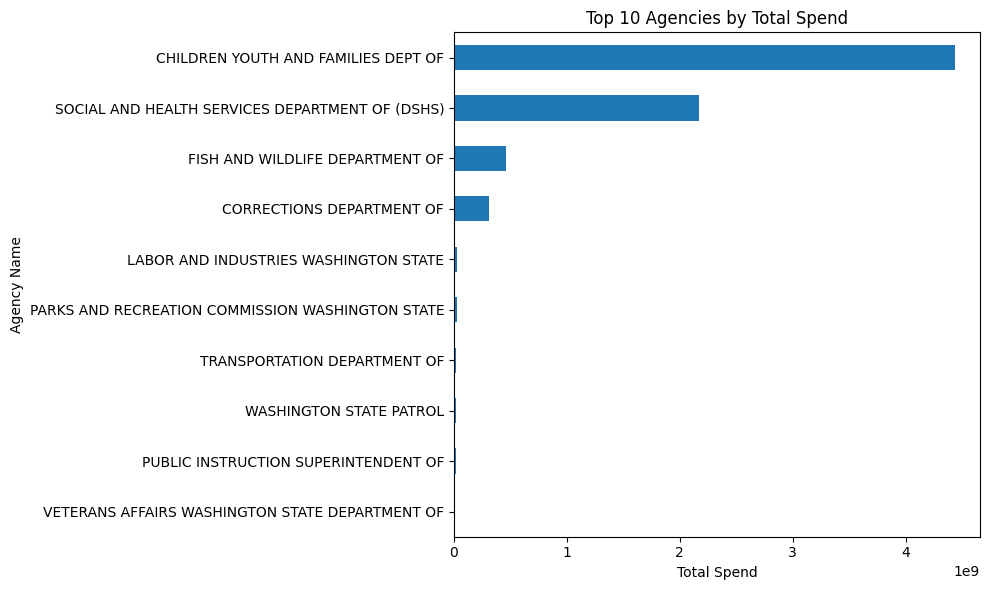

In [74]:
import matplotlib.pyplot as plt
import textwrap
agency_spend = df.groupby('agency_name')['agency_total_spend'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
agency_spend.sort_values().plot(kind='barh')

plt.title('Top 10 Agencies by Total Spend')
plt.xlabel('Total Spend')
plt.ylabel('Agency Name')
plt.tight_layout()
plt.show()


**Insight**: Spending is highly concentrated, with Children Youth and Families Dept contributing the largest share by a significant margin compared to other agencies. The remaining agencies have relatively small spending shares, creating a long‑tail structure. Overall, this highlights that optimization efforts should focus primarily on the top two agencies, as they drive the majority of total spend.

### 2. Monthly Spending Trend

**Chart Type**: Line Chart<br>
**Purpose**: To analyze how total spending changes month by month during FY 2025.<br>

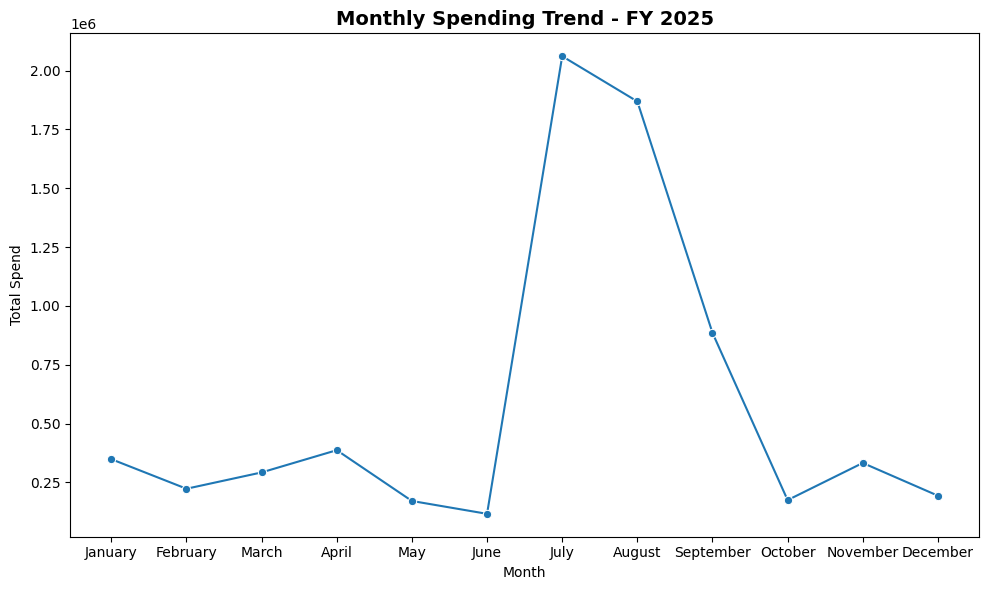

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by month with observed=True to avoid FutureWarning
monthly_spend = (
    df.groupby('order_month', observed=True)['payment_amount']
      .sum()
      .sort_index()
)

# Use seaborn style for neatness
plt.figure(figsize=(10,6))
sns.lineplot(x=monthly_spend.index, y=monthly_spend.values, marker='o')

plt.title("Monthly Spending Trend - FY 2025", fontsize=14, fontweight='bold')
plt.xlabel("Month")
plt.ylabel("Total Spend")
plt.tight_layout()
plt.show()

**Insight**: 
Peak in July: Spending spikes dramatically in July, crossing 2 million units. This suggests a major procurement cycle, possibly tied to fiscal-year midpoints, seasonal projects, or bulk purchases.

Sharp Decline in September: After July, spending drops steeply, indicating either budget exhaustion, completion of projects, or procurement freeze.

Stable Low Spend in Other Months: The rest of the year shows relatively modest and stable spending, highlighting July as the outlier month driving overall spend.

### 3. Quarterly Spend Distribution

**Chart Type**: Bar Chart<br>
**Purpose**: To evaluate spending distribution across financial quarters.<br>

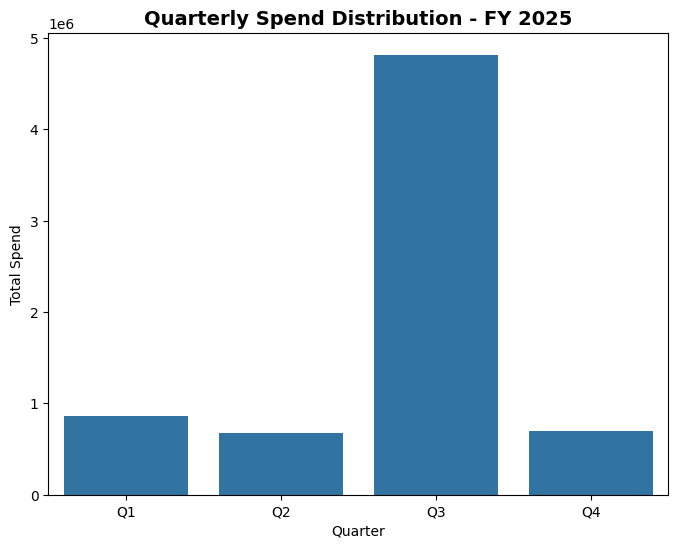

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate spend by quarter
quarterly_spend = (
    df.groupby('order_quarter', observed=True)['payment_amount']
      .sum()
      .sort_index()
)

plt.figure(figsize=(8,6))
sns.barplot(x=quarterly_spend.index, y=quarterly_spend.values)

plt.title("Quarterly Spend Distribution - FY 2025", fontsize=14, fontweight='bold')
plt.xlabel("Quarter")
plt.ylabel("Total Spend")
plt.show()

**Insights**: <br>
Q3 dominates spending: Nearly 5 million is spent in Q3, which is dramatically higher than all other quarters. This suggests a concentrated procurement cycle, likely tied to mid-year budget utilization, project deadlines, or seasonal requirements.

Q1 moderate activity: Spending is just under 1 million, showing a reasonable start to the fiscal year.

Q2 and Q4 are minimal: Both hover slightly above 0.5 million, indicating relatively low procurement activity compared to Q1 and Q3.

### 4. Category-wise Spend Distribution

**Chart Type**: Pie Chart<br>
**Purpose**: To understand how spending is distributed across product categories.<br>

C:\Users\Dell\AppData\Local\Temp\ipykernel_10936\1137761384.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_spend = df.groupby('product_category')['payment_amount'].sum()


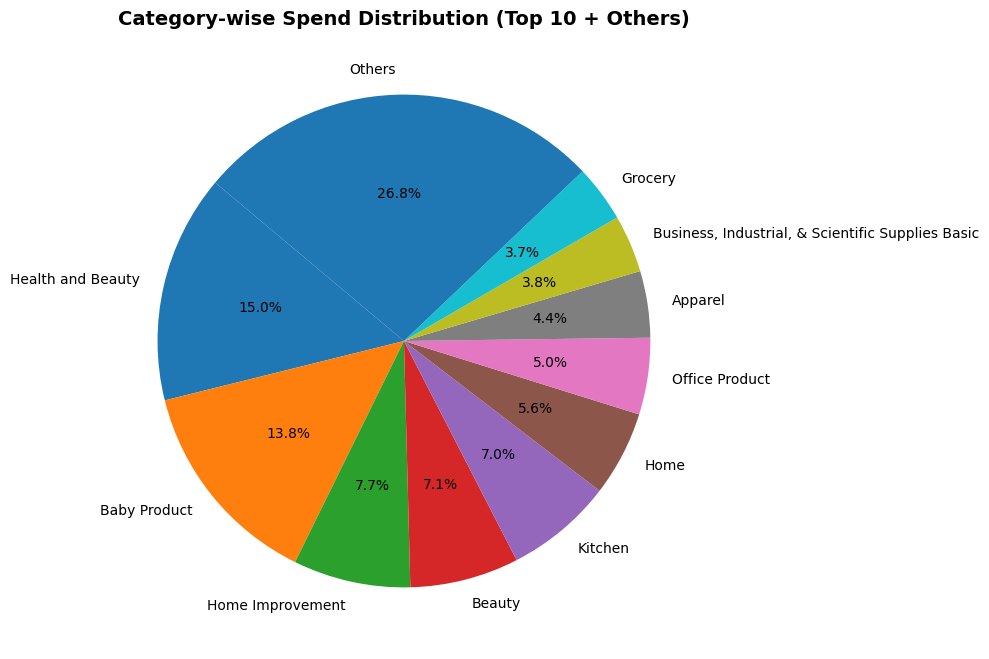

In [77]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Aggregate spend by category
category_spend = df.groupby('product_category')['payment_amount'].sum()

# Step 2: Sort and split into top 10 + others
top10 = category_spend.sort_values(ascending=False).head(10)
others = category_spend.sort_values(ascending=False).iloc[10:].sum()

# Step 3: Combine using concat instead of append
category_spend_final = pd.concat([top10, pd.Series({'Others': others})])

# Step 4: Plot pie chart
plt.figure(figsize=(8,8))
category_spend_final.plot(kind='pie', autopct='%1.1f%%', startangle=140)

plt.title("Category-wise Spend Distribution (Top 10 + Others)", fontsize=14, fontweight='bold')
plt.ylabel("")  # remove y-label for neatness
plt.show()

**Insight**: <br> “Others” is the largest slice (34.3%) → spending is spread across many smaller categories.

Top categories are Health & Beauty (15%), Baby Products (13.8%), and Home Improvement (7.7%) → these are the main drivers of procurement.

Remaining categories like Beauty, Kitchen, Home, Office Products, and Apparel each contribute smaller but still notable shares.

Procurement is concentrated in a few big categories, but a large portion of spending is scattered across many smaller ones. This shows both dominant spend areas and a long tail of diverse purchases.

### 5. Monthly Spend by Category

**Chart Type**: Stacked Bar Chart<br>
**Purpose**: To examine category-level spending trends over different months.<br>

C:\Users\Dell\AppData\Local\Temp\ipykernel_10936\4017978691.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_spend = df.groupby('product_category')['payment_amount'].sum()


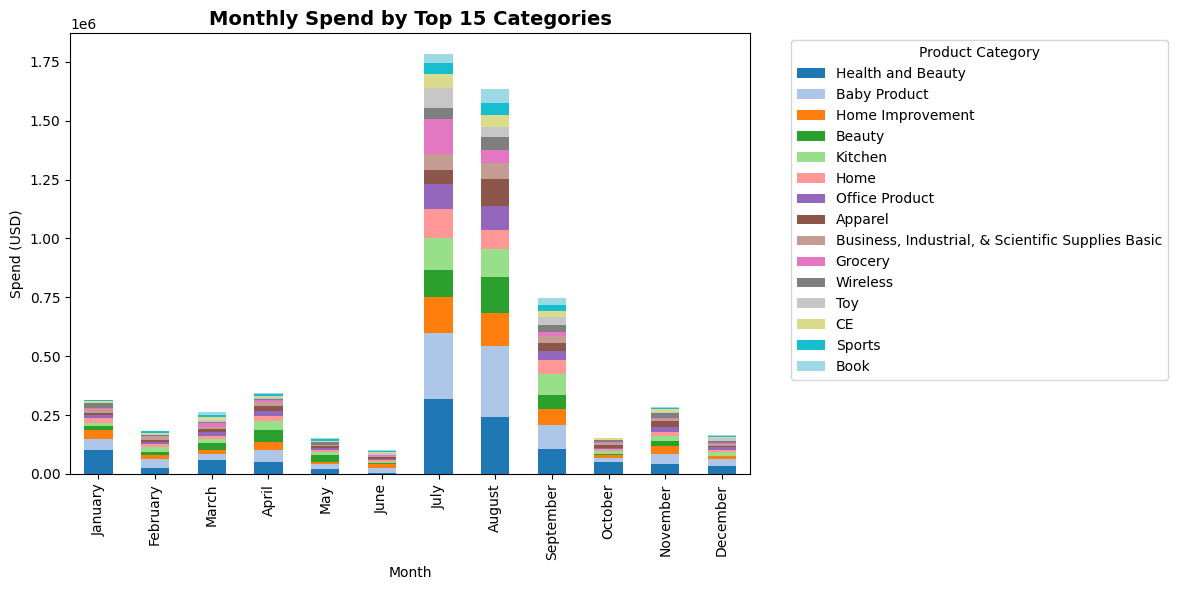

In [78]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Aggregate spend by category
category_spend = df.groupby('product_category')['payment_amount'].sum()

# Step 2: Get top 15 categories
top15_categories = category_spend.sort_values(ascending=False).head(15).index

# Step 3: Filter dataset to only top 15 categories
df_top15 = df[df['product_category'].isin(top15_categories)]

# Step 4: Group by month and category with observed=True to avoid FutureWarning
monthly_category_top15 = (
    df_top15.groupby(['order_month','product_category'], observed=True)['payment_amount']
    .sum()
    .unstack(fill_value=0)
)

# Step 5: Plot stacked bar chart
ax = monthly_category_top15[top15_categories].plot(
    kind='bar', stacked=True, figsize=(12,6), colormap="tab20"
)

plt.title("Monthly Spend by Top 15 Categories", fontsize=14, fontweight='bold')
plt.ylabel("Spend (USD)")
plt.xlabel("Month")
plt.legend(title="Product Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Insight**: July and August are peak months → spending shoots up, with July being the highest. June is the lowest month, showing minimal procurement.
The main categories driving these peaks are Health and Beauty, Baby Products, Beauty, Books, and Apparel.

Procurement is heavily concentrated in mid-year (July–September), with a few categories dominating the spend. The rest of the year shows much lower activity, meaning agencies likely rush purchases in those peak months.

### 6. Agency vs Category Heatmap

**Chart Type**: Heatmap<br>
**Purpose**: To visualize spending intensity between agencies and product categories.<br>

C:\Users\Dell\AppData\Local\Temp\ipykernel_10936\1059423897.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_agencies = df.groupby('agency_name')['payment_amount'].sum().nlargest(10).index
C:\Users\Dell\AppData\Local\Temp\ipykernel_10936\1059423897.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_categories = df.groupby('product_category')['payment_amount'].sum().nlargest(10).index


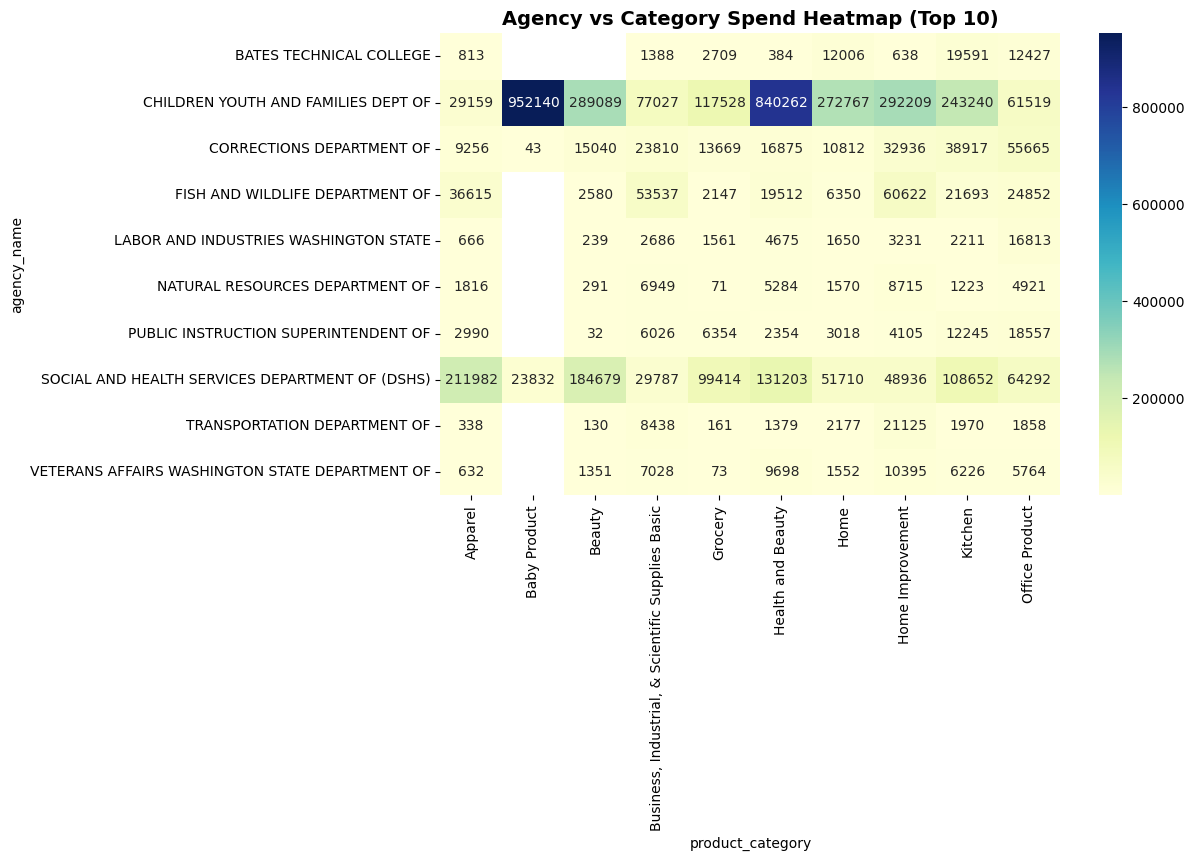

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Top 10 agencies by spend
top_agencies = df.groupby('agency_name')['payment_amount'].sum().nlargest(10).index

# Top 10 categories by spend
top_categories = df.groupby('product_category')['payment_amount'].sum().nlargest(10).index

# Filter dataset
df_filtered = df[df['agency_name'].isin(top_agencies) & df['product_category'].isin(top_categories)]

# Pivot table
pivot = df_filtered.pivot_table(values="payment_amount",
                                index="agency_name",
                                columns="product_category",
                                aggfunc="sum",
                                observed=True)

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Agency vs Category Spend Heatmap (Top 10)", fontsize=14, fontweight='bold')
plt.show()

**Insight**: <br>
Children, Youth and Families Department dominates spending across multiple categories (especially Baby Products, Health & Beauty, Grocery, and Apparel) → this agency is the single largest driver of procurement in the dataset.

Social and Health Services Department (DSHS) also shows very high spend, spread across categories like Apparel, Beauty, Office Products, and Health & Beauty → indicating broad procurement needs.

Other agencies (e.g., Corrections Department, Fish & Wildlife, Transportation Department) show much smaller, more specialized spending patterns, often concentrated in one or two categories.

Procurement is highly concentrated in a few large agencies (Children & Families, DSHS), while smaller agencies show niche category focus. This suggests that procurement strategy should prioritize monitoring and optimizing spend for the big agencies, while tailoring category-specific contracts for smaller ones.


## (II) Cost Driver Identification

Cost Driver Identification is the process of analyzing which factors (such as item subtotal, tax, shipping, quantity, or discounts) contribute most to the total procurement cost.

It helps identify what is increasing overall expenses so organizations can control spending and optimize procurement decisions.

### 1. Cost Distribution with Category

**Chart Type**: Box Plot<br>
**Purpose**: Identify spread and extreme values in cost components.<br>

C:\Users\Dell\AppData\Local\Temp\ipykernel_10936\3884149435.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_top10.groupby('product_category')['item_net_total']


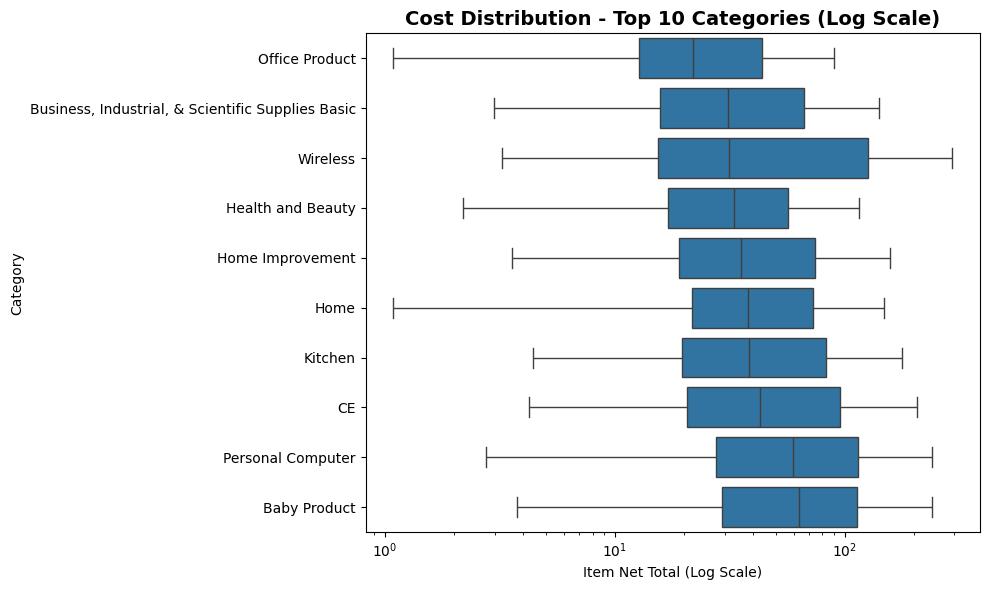

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Clean category column (very important)
df['product_category'] = df['product_category'].str.strip()

# Step 1: Get Top 10 categories by total spend
top10_categories = (
    df.groupby('product_category')['item_net_total']
      .sum()
      .sort_values(ascending=False)
      .head(10)
      .index.tolist()
)

# Step 2: Keep ONLY top 10 rows
df_top10 = df[df['product_category'].isin(top10_categories)].copy()

# Step 3: Make category column ordered (forces only 10 categories)
df_top10['product_category'] = pd.Categorical(
    df_top10['product_category'],
    categories=top10_categories,
    ordered=True
)

# Step 4: Sort categories by median cost (better visual order)
order = (
    df_top10.groupby('product_category')['item_net_total']
      .median()
      .sort_values()
      .index
)

# Step 5: Plot
plt.figure(figsize=(10,6))

sns.boxplot(
    data=df_top10,
    y='product_category',
    x='item_net_total',
    order=order,
    showfliers=False
)

plt.xscale('log')

plt.title("Cost Distribution - Top 10 Categories (Log Scale)", fontsize=14, fontweight='bold')
plt.xlabel("Item Net Total (Log Scale)")
plt.ylabel("Category")

plt.tight_layout()
plt.show()

**Insight**: <br> High variability: Categories like Baby Product, CE have wide spreads, Wireless and Personal Computer show strong variability meaning item costs vary greatly within them.

Stable ranges: Office Products show relatively tighter interquartile range compared to technology-driven categories.

Outliers present: Several categories (e.g., Wireless, Personal Computer) have extreme values, suggesting occasional high-cost items that skew procurement.

Some categories (Baby, Health, CE) drive unpredictable spending, while others (Office, Kitchen) remain stable, helping identify where procurement costs are volatile versus controlled. Technology-oriented categories such as Wireless and Personal Computer show higher dispersion, suggesting occasional high-value or bulk purchases.

### 2. Bulk Purchase Analysis (Quantity vs Cost)

**Chart tpe:** Scatter Plot<br>
**Purpose:** Check whether bulk buying reduces per-unit cost.<br>

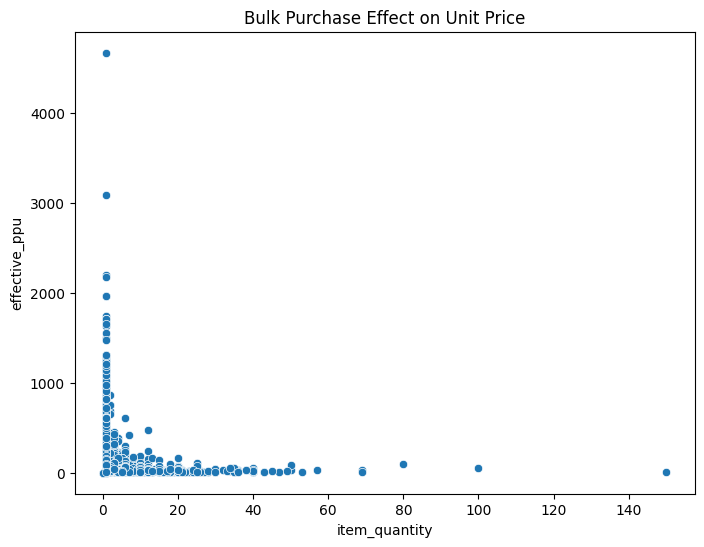

In [81]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='item_quantity',
                y='effective_ppu',
                data=df)
plt.title("Bulk Purchase Effect on Unit Price")
plt.show()

**Insight:** <br> 
Bulk purchase reduces unit price. As quantity increases, the unit price generally decreases.
Small quantity purchases have high price variation.
When quantity is low (1–10 items), prices vary a lot — some are very expensive (outliers).
Higher quantities generally show lower and less dispersed unit prices compared to low-quantity purchases.
When buying in bulk (20+ items), prices are mostly low and consistent.

There is a negative relationship between quantity and unit price —
Buying more items usually reduces the cost per unit.

While the trend suggests a bulk purchase cost advantage, the variability indicates that pricing may also depend on item type or category.

### 3. Distribution of Item Costs 

**Chart type:** Density plot<br>
**Purpose:** Distribution of item net totals across all purchases.
It helps identify whether most items are low-cost, mid-range, or high-cost, and how frequently each cost range occurs.

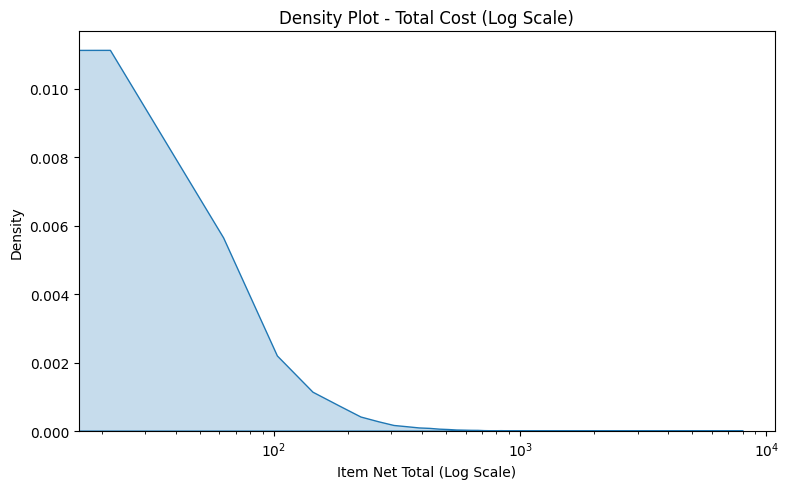

In [82]:
plt.figure(figsize=(8,5))

sns.kdeplot(df['item_net_total'], fill=True)

plt.xscale('log')   # log scale

plt.title("Density Plot - Total Cost (Log Scale)")
plt.xlabel("Item Net Total (Log Scale)")
plt.ylabel("Density")

plt.tight_layout()
plt.show()

**Insights:** <br> Most items cluster at the lower cost range, with density dropping as costs increase.<br>
There are fewer but notable high-cost items, visible in the long tail of the distribution.
This pattern suggests procurement is dominated by many small-value purchases, with occasional large-value items driving spikes.

The density chart shows that procurement is skewed toward low-cost items, with a few high-cost purchases creating a long tail. The log scale ensures this wide variation is represented clearly and comparably.

# III Vendor / Seller Concentration Risk

Vendor or Seller Concentration Risk analysis assesses the financial and operational vulnerability of a business that relies too heavily on a single supplier or a small group of suppliers that could trigger a single point of failure within your supply chain. By mapping spend distribution and market share, these visuals enable stakeholders to strategically diversify the vendor base and mitigate the financial or operational impact of a single vendor’s disruption.

### 1. Seller Market Share

**Chart Type:** Interactive Donut Chart<br>
**Purpose:** How procurement spending is distributed among sellers.<br>

In [83]:
import plotly.express as px
import pandas as pd

# Calculate seller revenue
seller_total = (
    df.groupby('seller_name', as_index=False)['item_net_total']
      .sum()
      .sort_values(by='item_net_total', ascending=False)
)
# Calculate percentage
seller_total['percent'] = (
    seller_total['item_net_total'] /
    seller_total['item_net_total'].sum()
) * 100

# Keep top 10 sellers
top10 = seller_total.head(10)

# Group remaining sellers as "Others"
others = pd.DataFrame({
    'seller_name': ['Others'],
    'item_net_total': [seller_total.iloc[10:]['item_net_total'].sum()],
    'percent': [seller_total.iloc[10:]['percent'].sum()]
})

clean_data = pd.concat([top10, others])

# Create donut chart
fig = px.pie(
    clean_data,
    names='seller_name',
    values='item_net_total',
    hole=0.55,
    title="Seller Market Share (Top 10 + Others)"
)
fig.update_traces(
    textposition='inside',
    textinfo='percent+label'
)
fig.update_layout(
    height=600,
    showlegend=True
)
fig.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_10936\587498162.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('seller_name', as_index=False)['item_net_total']


**Insight:** <br> Amazon dominates spending (37%) – A significant portion of procurement is concentrated with one seller.

Many small sellers exist (59% combined) – While spending is somewhat diversified, no single seller strongly competes with Amazon.

Moderate vendor concentration risk – Heavy reliance on one primary vendor may create pricing and supply dependency risks.

The chart shows that procurement spending is moderately concentrated, with Amazon accounting for a large share of total purchases. Although multiple smaller sellers are involved, the dependency on one major vendor indicates potential concentration risk and limited supplier diversification.

### 2. Vendor Spend Distribution

**Chart Type:** Violin plot<br>
**Purpose:** Visualize the distribution of total spend per vendor. Understand the spread, density, and median spending.Identify whether vendor spending is evenly distributed or concentrated<br>

In [84]:
import plotly.express as px

# Aggregate spend per vendor using seller_name
vendor_spend = (
    df.groupby('seller_name')['item_net_total']
    .sum()
    .reset_index()
)

# Remove top 1% extreme vendors to avoid skew
upper_limit = vendor_spend["item_net_total"].quantile(0.99)
filtered = vendor_spend[vendor_spend["item_net_total"] <= upper_limit]

# Violin plot with Plotly
fig = px.violin(
    filtered,
    y="item_net_total",
    box=True,
    points="outliers",
    title="Vendor Spend Distribution (Without Extreme Outliers)"
)

fig.update_layout(
    template="plotly_white",
    height=600,
    yaxis_title="Total Spend per Vendor"
)
fig.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_10936\423030908.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



**Insight:** <br> Right-skewed distribution: Most vendors cluster at lower spend values, with a long tail extending upward.

The embedded box plot confirms that the central tendency is relatively low compared to the maximum values.

A small number of vendors account for disproportionately higher spending.

The chart shows that vendor spending is highly skewed, with the majority of vendors contributing small amounts while a limited number account for higher spending. This suggests partial concentration risk and dependency on select vendors.

# (IV) Discount & Promotion Effectiveness

The purpose of Discount & Promotion Effectiveness visualizations is to determine if price reductions actually drive a proportional increase in sales volume (item_quantity) or if they simply erode profit margins (item_net_total). By mapping discount depth against order frequency, these visuals identify which promotions successfully change buyer behavior versus those that subsidize purchases that would have happened anyway.

### 1. Frequency of discounts applied

**Chart Type:** Count Plot<br>
**Purpose:** Show the frequency of discount types (% off vs. $ off).<br>

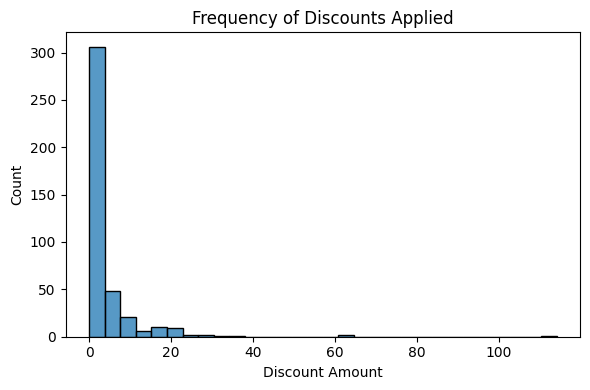

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.histplot(df[df['discount_amount'] > 0]['discount_amount'], bins=30, kde=False)
plt.title("Frequency of Discounts Applied")
plt.xlabel("Discount Amount")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

**Insight:** <br> Most discounts are very small — the distribution is heavily concentrated near zero, meaning agencies usually receive minimal reductions per transaction.

Large discounts are rare — only a few transactions show higher discount amounts, indicating promotions or special deals are not widespread.

Overall savings skew low — procurement relies more on small, frequent discounts rather than big one‑time reductions.

The chart shows that procurement discounts are mostly minor, with only occasional larger savings. This suggests promotions provide incremental cost relief rather than dramatic reductions.

### 2. Discount % vs Savings

**Chart Type:** scatterplot<br>
**Purpose:** Show relationship between discount percentage and actual savings.<br>

In [86]:
import pandas as pd
import plotly.express as px

# Create derived fields
df['savings_amount'] = df['discount_amount']   # direct savings
df['discount_percent'] = (df['discount_amount'] / df['payment_amount']) * 100

# Scatter plot with Plotly
fig = px.scatter(
    df[df['discount_percent'] > 0],   # filter to positive discounts
    x="discount_percent",
    y="savings_amount",
    color="agency_name",              # optional: color by agency
    hover_data=["product_category", "payment_amount"], # extra info on hover
    opacity=0.6,
    title="Discount % vs Actual Savings"
)
# Axis labels
fig.update_layout(
    xaxis_title="Discount Percent",
    yaxis_title="Savings Amount",
    template="plotly_white"
)
fig.show()


**Insight:** <br> Most points cluster at low discount % and low savings — meaning typical procurement discounts are small and yield modest savings.

A few outliers show higher discounts or larger savings — these are rare cases where promotions or special deals significantly reduce costs.

Agency variation is visible — some agencies consistently capture higher savings, while others remain concentrated in the low‑discount, low‑savings zone.

The chart shows that procurement discounts are generally modest, with only occasional high‑value savings. Effectiveness varies across agencies, suggesting that some leverage promotions better than others.

### 3. Savings due to promotions

**Chart Type:** Histogram<br>
**Purpose:** The histogram shows the distribution of savings amounts due to promotions, helping to understand how often different levels of discounts occur in procurement. It highlights whether savings are typically small, moderate, or large.<br>

In [87]:
import plotly.express as px

# Use only positive savings (filter out negatives if they represent refunds/adjustments)
df['savings_amount'] = df['discount_amount']
df_pos = df[df['savings_amount'] > 0]

# Plotly histogram
fig = px.histogram(
    df_pos,
    x="savings_amount",
    nbins=40,                     # number of bins for clarity
    title="Distribution of Savings Due to Promotions",
    labels={"savings_amount": "Savings Amount"},
    color_discrete_sequence=["green"]  # consistent color
)

# Layout adjustments
fig.update_layout(
    xaxis_title="Savings Amount",
    yaxis_title="Frequency",
    bargap=0.05,                  # small gap between bars
    template="plotly_white"
)
fig.show()


**Insight:** <br> Most savings are clustered at the lower end, meaning promotions usually provide small cost reductions.

Larger savings are rare events, occurring infrequently compared to smaller discounts.

The distribution is skewed toward small savings, showing promotions are more incremental than transformative.

This chart reveals that promotional savings are mostly minor, with only occasional large discounts. Procurement benefits from frequent small reductions rather than big one‑time savings, suggesting promotions are effective in spreading modest cost relief across many transactions.

### 4. Agencies benefiting most from discounts

**Chart Type:** Treemap visualization<br>
**Purpose:** The treemap shows the Top 10 agencies benefiting most from discounts, with block size and color intensity representing the magnitude of savings. Its purpose is to highlight which agencies capture the largest share of promotional savings and to visualize concentration across organizations.<br>

In [88]:
import plotly.express as px

# Aggregate savings per agency
agency_savings = (
    df.groupby('agency_name')['discount_amount']
    .sum()
    .reset_index()
)
# Convert to positive values (absolute savings)
agency_savings['total_savings'] = agency_savings['discount_amount'].abs()

# Keep only Top 10 agencies
top10_agencies = agency_savings.sort_values(by='total_savings', ascending=False).head(10)

# Treemap visualization
fig = px.treemap(
    top10_agencies,
    path=['agency_name'],          # hierarchy (only agency here)
    values='total_savings',        # block size = savings
    color='total_savings',         # color intensity = savings
    color_continuous_scale='Blues',
    title="Top 10 Agencies Benefiting Most from Discounts"
)
fig.update_layout(
    template="plotly_white"
)
fig.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_10936\1147903156.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



**Insight:** <br> A few agencies dominate the savings, with one or two capturing significantly higher discounts than others.

Smaller agencies contribute relatively little, showing that savings are unevenly distributed.

The visualization suggests concentration risk, where procurement benefits are heavily tied to a limited set of agencies.

This treemap reveals that promotional savings are not evenly spread across agencies. Instead, a handful of agencies capture the majority of discounts, while most others benefit only marginally. The chart highlights both the leaders in savings and the imbalance in distribution, useful for identifying dependency patterns in procurement.

# (V) Category-Level Optimization

Category-Level Optimization visualization analysis uses your product_category, item_net_total, and item_quantity columns to determine which product groups drive the most value and which are underperforming. The primary goal is to allocate budget and resources toward categories with high growth potential while identifying "laggards" that may require vendor renegotiation or discontinuation.

### 1. Spend vs Quantity by Category

**Chart Type:** 3D bubble chart<br>
**Purpose:** This 3D bubble chart compares Top 10 product categories across three dimensions: total spend, average unit price, and quantity purchased. Its purpose is to reveal procurement efficiency and highlight categories that dominate spending.<br>

In [89]:
import plotly.express as px

# Aggregate category-level metrics
category_summary = df.groupby('product_category').agg(
    total_spend=('item_net_total','sum'),
    total_quantity=('item_quantity','sum'),
    avg_unit_price=('effective_ppu','mean')
).reset_index()

# Keep Top 10 categories by spend
top10_categories = category_summary.sort_values(by='total_spend', ascending=False).head(10)

# 3D bubble chart
fig = px.scatter_3d(
    top10_categories,
    x="total_quantity",       # X-axis: total items purchased
    y="avg_unit_price",       # Y-axis: average unit price
    z="total_spend",          # Z-axis: total spend
    size="total_spend",       # bubble size = spend magnitude
    color="product_category", # color by category
    hover_data=["product_category","total_spend","avg_unit_price","total_quantity"],
    title="Top 10 Product Categories by Spend (3D Bubble Chart)"
)

#  Layout polish
fig.update_layout(
    template="plotly_white",
    scene=dict(
        xaxis_title="Total Quantity",
        yaxis_title="Average Unit Price",
        zaxis_title="Total Spend"
    )
)

fig.show()

**Insight:** <br> Some categories (like Home Improvement, Home and Kitchen) show very high spend, making them major cost drivers.

Categories with high unit price but lower quantities indicate potential inefficiency and areas for negotiation.

Categories with balanced spend and quantity suggest optimized procurement practices.

The chart shows that spending is concentrated in a few categories, with Home Improvement and Home leading. Categories with high average unit prices but lower volumes may require procurement optimization. Overall, the visualization helps identify where savings opportunities and efficiency improvements are most needed.

### 2. Spread of Savings by Category

**Chart Type:** Swarm Plot<br>
**Purpose:** This swarm plot shows the spread of savings across product categories, with each dot representing a transaction’s savings amount. It helps identify which categories generate consistent savings and which show wide variability.<br>

In [90]:
df['savings_amount'] = df['discount_amount'].abs()

fig = px.strip(
    df[df['savings_amount'] > 0],
    x="product_category",
    y="savings_amount",
    color="product_category",
    hover_data=["agency_name","payment_amount"],
    title="Spread of Savings by Product Category",
    stripmode="overlay"
)
fig.update_traces(jitter=0.35, marker=dict(opacity=0.6, size=6))
fig.update_layout(template="plotly_white", xaxis_tickangle=45)
fig.show()


**Insight:** <br> Most categories cluster at lower savings amounts, meaning discounts are generally modest.

Certain categories (like Health and Beauty and Wireless) show higher savings outliers, indicating occasional large discounts.

The spread varies by category — some have tight ranges (predictable savings), while others are scattered widely (inconsistent discounting).

The chart reveals that promotional savings are uneven across categories. While most categories deliver small, consistent savings, a few stand out with large but infrequent discounts. This suggests procurement optimization should focus on categories with high variability to stabilize savings.

### 3. Unit Price Distribution per Category

**Chart Type:** Bar chart<br>
**Purpose:** This bar chart compares the Top 10 product categories by average unit price, showing which categories are the most expensive per unit. It helps identify pricing trends and highlights categories that may require procurement optimization or negotiation.<br>

In [91]:
import plotly.express as px

# Aggregate average unit price per category
category_prices = df.groupby('product_category')['effective_ppu'].mean().reset_index()

# Sort categories by average unit price
category_prices = category_prices.sort_values(by='effective_ppu', ascending=False)

# Keep only Top 10 categories
top10_prices = category_prices.head(10)

# Bar chart visualization
fig = px.bar(
    top10_prices,
    x="product_category",
    y="effective_ppu",
    color="effective_ppu",
    color_continuous_scale="Blues",
    title="Top 10 Product Categories by Average Unit Price"
)

# Layout
fig.update_layout(
    template="plotly_white",
    xaxis_title="Product Category",
    yaxis_title="Average Unit Price",
    xaxis_tickangle=45
)

fig.show()


**Insight:** <br> Categories like Amazon E‑readers and Digital Software have the highest average unit prices, making them premium cost drivers.

Several consumer electronics categories (Home Theater, GPS/Navigation, Premium Brands) cluster near the top, indicating that technology products dominate high‑price segments.

Categories such as Furniture and Video Games appear lower in the top 10, showing relatively more affordable unit pricing compared to premium electronics.


The chart reveals that electronics and digital products dominate the highest unit prices, with Amazon E‑readers and Digital Software leading. Premium consumer electronics categories consistently show elevated costs, while non‑tech categories like Furniture and Video Games are comparatively lower. This suggests procurement strategies should focus on negotiating or optimizing purchases in high‑price electronics categories to achieve savings.

<div style="background-color:#ffffff;
color:#4A90E2;
padding:12px;
border-radius:6px;
border-left:6px solid #065f46;">
✅ <b>Visualization completed:</b> Visual insights were developed to identify spending concentration, unit price variability, and discount effectiveness across product categories.

<h2 style="text-align:center; color:#0B5D1E; background-color:white;">
    Insight Generation and Report
</h2

## Objective of the Analysis

The objective of this project was to analyze State Agency procurement data to identify key spending patterns, major cost drivers, vendor concentration levels, and purchasing trends. Through systematic data preprocessing, exploratory data analysis (EDA), and interactive visual analytics, the study aims to uncover meaningful insights that support cost optimization, vendor risk management, and strategic procurement decision-making.

## Data Preparation summary

The original dataset consisted of 30,669 procurement records containing a combination of numerical and categorical variables. Several preprocessing steps were undertaken to enhance data quality and analytical reliability, including handling missing values, removing duplicate entries, standardizing column names and categorical labels, correcting data types, and eliminating completely empty or non-informative columns. Additionally, the dataset was filtered to focus on high-value orders to ensure meaningful analysis.

Feature engineering techniques were applied to improve analytical depth and interpretability. These included deriving time-based features such as order month and quarter, creating pricing and spend-related metrics, and constructing agency-level aggregated indicators to measure procurement volume and total expenditure. Outlier treatment was performed to improve distributional clarity, and cost components were separated to enable detailed cost driver assessment. After preprocessing and feature engineering, the final dataset comprised 25,543 records and 30 well-defined features, forming a robust foundation for comprehensive procurement and vendor concentration analysis.

## Exploratory Data Analysis Overview

Initial exploratory data analysis (EDA) revealed a significantly right-skewed distribution in procurement spending, characterized by a low median transaction value relative to extreme high-value outliers. This indicates that a small proportion of transactions disproportionately contribute to total expenditure, suggesting potential spend concentration. Descriptive statistics and distributional analysis confirmed the presence of high variance and long-tail behavior within the item_net_total variable.

Category-level aggregation identified dominant product categories contributing the highest cumulative revenue and transaction volume, reflecting structural concentration within specific procurement segments. Vendor-level analysis further demonstrated measurable seller concentration, with a limited number of vendors accounting for a substantial share of total spend, indicating potential supplier dependency risk.

Temporal analysis uncovered seasonal procurement patterns, with statistically higher transaction counts and revenue during peak months, suggesting cyclical purchasing behavior. Correlation analysis revealed near-perfect linear relationships between pricing components (e.g., item_subtotal and item_net_total), validating internal pricing consistency and confirming that net expenditure is predominantly driven by base pricing components. Multivariate evaluation across categories indicated that fluctuations in total revenue are jointly influenced by changes in both transaction volume and average order value, reinforcing the presence of cost-driver and vendor concentration dynamics within the procurement system.

## Key Analytical insights from the Visual Exploration

#### (i) Spending Pattern Analysis

The analysis reveals a highly seasonal procurement pattern, with a significant spending surge in July and strong Q3 dominance, indicating budget-driven purchasing cycles rather than uniform expenditure throughout the year. Spending is strategically concentrated among a few major agencies—particularly the Children, Youth and Families Department—and focused primarily on Health & Beauty and Baby Products, while a substantial portion remains distributed across long-tail categories.

Vendor and cost structure evaluation shows operational efficiency in shipping (majority $0 shipping) and predictable pricing behavior, with near-perfect correlation among subtotal, tax, and net total. However, the presence of extreme high-value transactions significantly skews overall spending metrics, suggesting periodic bulk or institutional procurement activity.

#### (ii) Cost Driver Identification

The analysis identifies Baby Products, Health & Beauty, and Consumer Electronics as high-variability cost drivers, showing wide price dispersion and less predictable spending patterns. In contrast, Office Products and Kitchen supplies demonstrate stable pricing behavior, making them easier to forecast and budget. Overall procurement spending follows a right-skewed distribution, dominated by low-cost items with a long tail of high-value outliers.

Bulk purchasing analysis confirms a strong economy-of-scale effect, where higher order quantities are associated with lower unit prices and improved price stability. Agency-level intensity reveals that the Children, Youth and Families Department is the primary expenditure driver, particularly within Baby Products and Health & Beauty, indicating that targeted optimization within this agency would yield the greatest budgetary impact.

#### (iii) Vendor / Seller Concentration Risk

The analysis highlights a significant dependency on Amazon, which accounts for 37.2% of total procurement spending, indicating moderate to high vendor concentration risk. Although the broader seller ecosystem appears fragmented—with smaller vendors collectively contributing 59% of total spend—no individual competitor meaningfully challenges Amazon’s dominance, reflecting limited Tier-2 competition.

Spend distribution analysis further confirms extreme skewness, where the majority of vendors receive minimal transactional spend while a small number capture disproportionately high-value procurement. This bottom-heavy and long-tailed structure suggests operational dependence on a few key suppliers, exposing the procurement system to pricing, contractual, and supply-side risks.

#### (iv) Discount & Promotion Effectiveness

The analysis indicates that procurement savings are primarily incremental rather than transformative, with most discounts clustered at low values and only a small number of high-impact promotional events. The distribution of savings is heavily right-skewed, suggesting that cost reductions are driven by frequent minor discounts rather than substantial one-time deals.

Savings are unevenly distributed across agencies, with larger departments—particularly the Children, Youth and Families Department—capturing a disproportionate share of promotional benefits. Additionally, performance variability across agencies suggests differences in procurement efficiency, contract leverage, or promotional utilization, highlighting opportunities for strategic optimization and standardized best practices.

#### (v) Category-Level Optimization

The analysis identifies Home Improvement, Home, and Kitchen as the primary cost drivers, contributing the highest total spend, while electronics-related categories exhibit premium unit pricing with significant budget impact per transaction. High-priced, low-volume categories reveal potential procurement inefficiencies, where strategic consolidation or vendor renegotiation could yield meaningful savings.

In contrast, categories such as Office Products demonstrate balanced and stable volume-price dynamics, indicating more optimized procurement behavior. Discount analysis further shows that savings are generally incremental across most categories, though select segments like Wireless and Shoes occasionally capture higher-value promotional gains, highlighting targeted opportunities for strategic cost optimization.

## Overall Findings and Conclusions

The analysis demonstrates that procurement spending is structurally concentrated, both in terms of categories and vendors, with a small number of high‑value transactions and dominant suppliers driving overall expenditure. Seasonal purchasing cycles, particularly in Q3, reinforce budget‑driven behavior, while agency‑level concentration—most notably within the Children, Youth and Families Department—further amplifies dependency risks. Cost driver evaluation highlights variability in categories such as Baby Products, Health & Beauty, and Consumer Electronics, contrasted with more stable segments like Office Products and Kitchen supplies. Vendor analysis confirms significant reliance on Amazon, underscoring supplier concentration risk, while discount effectiveness remains largely incremental, with savings unevenly distributed across agencies.

Overall, the procurement system exhibits spend concentration, seasonal dependency, and vendor dominance dynamics that introduce both financial exposure and strategic optimization opportunities. Targeted intervention—particularly within high-spend agencies and high-variability categories—would yield the greatest budgetary impact. Strengthening supplier diversification, enhancing competitive sourcing strategies, and standardizing discount utilization practices can improve cost efficiency, reduce concentration risk, and enhance long-term procurement resilience.

## Recommendation

#### 1. Spread out suppliers<br>
Don’t rely too heavily on Amazon. Work with more vendors so the system isn’t vulnerable if one supplier changes prices or terms.<br>
#### 2.Focus on costly categories<br>
Pay closer attention to Baby Products, Health & Beauty, and Consumer Electronics, since they show big price swings. These are the areas where better deals or tighter controls can save the most money.<br>
#### 3. Target key agencies<br>
The Children, Youth and Families Department spends the most, especially in high‑cost categories. Optimizing their purchases will have the biggest impact.<br>
#### 4. Plan for seasonal peaks<br>
Spending spikes in July and Q3. Planning ahead and spreading purchases more evenly can reduce budget stress.<br>
#### 5. Buy in bulk where possible  <br>
Larger orders tend to lower unit prices. Consolidating purchases can unlock savings and stabilize costs.<br>
#### 6. Make discounts work better  <br>
Right now, savings mostly come from small discounts. Standardizing how agencies use promotions and negotiating bigger deals can improve results.<br>

The agency should prioritize supplier diversification to reduce dependency on dominant vendors like Amazon and mitigate concentration risk. Strategic cost optimization efforts should focus on high-spend agencies—particularly the Children, Youth and Families Department—and high-variability categories such as Baby Products and Health & Beauty.

Additionally, implementing demand forecasting aligned with seasonal purchasing trends, strengthening bulk procurement strategies to leverage economies of scale, and standardizing discount utilization practices can significantly enhance cost efficiency, budget control, and long-term procurement resilience.